In [4]:
# Author: Kristine M. L. Krighaar
# Niels Bohr Institute, University of Copenhagen
#
# This notebook should run in NCCO_Env 


from KGS import *
from TASDataObjectIN20SQ import *
from scipy.interpolate import UnivariateSpline

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#0072BD','#D95319', '#c348db','#77AC30','#4DBEEE'])
mpl.rcParams['lines.markersize'] = 6


## Phonon fits for both sampels

### $\int \tilde{I}_{pho} d\mathbf{q}$

In [5]:
# Functions

def A_N_gauss(x, A_tot, f1, mu1, sigma1, mu2, sigma2,b):
    return A_tot*(f1*(1)/(np.sqrt(2*np.pi*sigma1**2))* np.exp(-(x-mu1)** 2 / (2*sigma1**2))+(1-f1)* (1)/(np.sqrt(2*np.pi*sigma2**2)) *np.exp(-(x-mu2)** 2 / (2*sigma2**2)))+b

# titel

In [6]:
# SC phonon
sc_phonon = np.genfromtxt('./Data_IN20/038367', skip_header = 63)

qk_sc_phonon = sc_phonon[:,2]
I_sc_phonon = sc_phonon[:,8]/20e6
err_sc_phonon = np.sqrt(sc_phonon[:,8])/20e6

params = {'A_tot': 0.1, 'f1': 0.5 ,'mu1':-0.1, 'sigma1':0.05, 
          'mu2': 0.05, 'sigma2':27.50e-3, 'b':0.00005}

limits = {'mu1': (-0.1, -0.07), 'sigma1':(0,0.2),'mu2':(0.03,0.1),'sigma2':(0,0.5), 'b':(0,None)}

gaussN_fit = fit(qk_sc_phonon, I_sc_phonon, err_sc_phonon, A_N_gauss, params, limits=limits)
gaussN_fit.hesse()


/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:301: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 388.9                      │             Nfcn = 1168              │
│ EDM = 3.26e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_tot  │ 24.77e-6  │  0.17e-6  │            │            │         │         │       │
│ 1 │ f1     │  0.5290   │  0.0034   │            │            │         │         │       │
│ 2 │ mu1    │ -70.00e-3 │  0.04e-3  │            │            │  -0.1   │  -0.07  │       │
│ 3 │ sigma1 │  45.7e-3  │  0.5e-3   │            │            │    0    │   0.2   │       │
│ 4 │ mu2    │ 47.45e-3  │  0.27e-3  │            │            │  0.03   │   0.1   │       │
│ 5 │ sigma2 │ 27.50e-3  │  0.24e-3  │            │            │    0    │   0.5   │       │
│ 6 │ b      │  7.1e-6   │  0.4e-6   │            │            │    0    │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────────────────────────────┐
│        │       A_tot          f1         mu1      sigma1         mu2      sigma2           b │
├────────┼─────────────────────────────────────────────────────────────────────────────────────┤
│  A_tot │    2.74e-14  85.587e-12          -0  20.833e-12   7.538e-12  10.811e-12  -0.044e-12 │
│     f1 │  85.587e-12    1.16e-05   0.011e-12     0.92e-6     0.42e-6    -0.28e-6 -126.26e-12 │
│    mu1 │          -0   0.011e-12    1.01e-14   0.001e-12   0.001e-12  -0.001e-12           0 │
│ sigma1 │  20.833e-12     0.92e-6   0.001e-12    2.06e-07     0.05e-6    -0.02e-6  -37.97e-12 │
│    mu2 │   7.538e-12     0.42e-6   0.001e-12     0.05e-6    7.47e-08    -0.03e-6  -16.20e-12 │
│ sigma2 │  10.811e-12    -0.28e-6  -0.001e-12    -0.02e-6    -0.03e-6    5.61e-08  -37.69e-12 │
│      b │  -0.044e-12 -126.26e-12           0  -37.97e-12  -16.20e-12  -37.69e-12    1.47e-13 │
└────────┴─────────────────────────────────────────────────────────────────────────────────────┘

In [7]:
# AG phonon
ag_phonon = np.genfromtxt('./Data_IN20/038498', skip_header = 63)
qk_ag_phonon = ag_phonon[:,2]
I_ag_phonon = ag_phonon[:,8]/20e6
err_ag_phonon = np.sqrt(ag_phonon[:,8])/20e6

params_ag = {'A_tot': 0.1, 'f1': 0.5 ,'mu1':-0.1, 'sigma1':0.05, 
          'mu2': 0.05, 'sigma2':27.50e-3, 'b':0.00001}

limits_ag = {'mu1': (-0.1, -0.03), 'sigma1':(0,0.1),'mu2':(0.03,0.1),'sigma2':(0,0.5)}

fixed_ag = {'b':0.0001}

gaussN_fit_ag = fit(qk_ag_phonon, I_ag_phonon, err_ag_phonon, A_N_gauss, params_ag, limits=limits_ag)
gaussN_fit_ag.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 359.5                      │             Nfcn = 1091              │
│ EDM = 1.54e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_tot  │  73.5e-6  │  0.5e-6   │            │            │         │         │       │
│ 1 │ f1     │   0.500   │   0.005   │            │            │         │         │       │
│ 2 │ mu1    │ -49.7e-3  │  0.6e-3   │            │            │  -0.1   │  -0.03  │       │
│ 3 │ sigma1 │  43.6e-3  │  0.5e-3   │            │            │    0    │   0.1   │       │
│ 4 │ mu2    │  54.8e-3  │  0.4e-3   │            │            │  0.03   │   0.1   │       │
│ 5 │ sigma2 │ 33.50e-3  │  0.32e-3  │            │            │    0    │   0.5   │       │
│ 6 │ b      │  65.3e-6  │  1.5e-6   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬──────────────────────────────────────────────────────────────────────────────┐
│        │      A_tot         f1        mu1     sigma1        mu2     sigma2          b │
├────────┼──────────────────────────────────────────────────────────────────────────────┤
│  A_tot │   2.48e-13  85.17e-12 -63.23e-12  75.84e-12  25.12e-12  70.59e-12  -0.66e-12 │
│     f1 │  85.17e-12   2.71e-05     2.8e-6    2.02e-6    1.82e-6   -1.16e-6 -130.6e-12 │
│    mu1 │ -63.23e-12     2.8e-6   3.88e-07    0.20e-6    0.20e-6   -0.15e-6  209.7e-12 │
│ sigma1 │  75.84e-12    2.02e-6    0.20e-6   2.18e-07    0.15e-6   -0.06e-6 -221.1e-12 │
│    mu2 │  25.12e-12    1.82e-6    0.20e-6    0.15e-6   1.63e-07   -0.08e-6  -69.7e-12 │
│ sigma2 │  70.59e-12   -1.16e-6   -0.15e-6   -0.06e-6   -0.08e-6   9.98e-08 -224.8e-12 │
│      b │  -0.66e-12 -130.6e-12  209.7e-12 -221.1e-12  -69.7e-12 -224.8e-12   2.17e-12 │
└────────┴──────────────────────────────────────────────────────────────────────────────┘

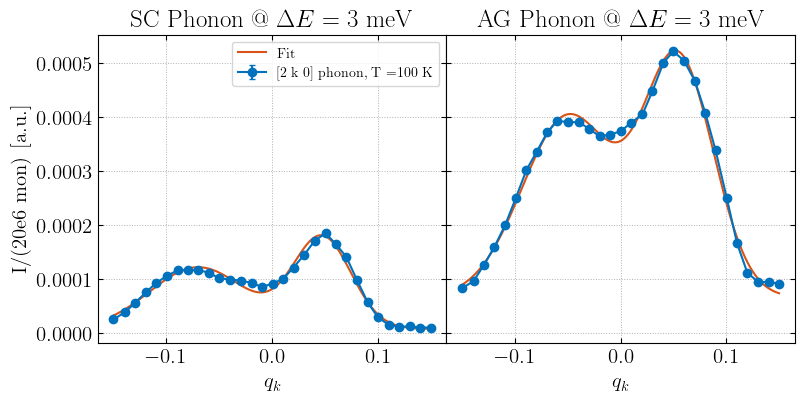

In [8]:
qk_range = np.linspace(min(qk_sc_phonon), max(qk_sc_phonon), 1000)

phonon_area_sc = gaussN_fit.values[0]
phonon_area_ag = gaussN_fit_ag.values[0]

fig, ax = plt.subplots(1,2, figsize=(9,4), sharey=True)

ax[0].errorbar(qk_sc_phonon, I_sc_phonon, err_sc_phonon, fmt='o-', label='[2 k 0] phonon, T =100 K')
ax[0].plot(qk_range, A_N_gauss(qk_range, *gaussN_fit.values), label='Fit')
ax[0].set_ylabel('I/(20e6 mon) [a.u.]')
ax[0].set_xlabel(r'$q_k$')
ax[0].set_title(r'SC Phonon @ $\Delta E = 3$ meV')
ax[0].legend(fontsize=10)

ax[1].errorbar(qk_ag_phonon, I_ag_phonon, err_ag_phonon, fmt='o-', label='2 k 0 phonon, T =100 K')
ax[1].plot(qk_range, A_N_gauss(qk_range, *gaussN_fit_ag.values), label='Fit')
#ax[1].set_ylabel('I/mon [a.u.]')
ax[1].set_xlabel(r'$q_k$')
ax[1].set_title(r'AG Phonon @ $\Delta E = 3$ meV')

plt.subplots_adjust(wspace=0)
ax[0].grid(True, which='both', linestyle=':', linewidth=0.7)
ax[1].grid(True, which='both', linestyle=':', linewidth=0.7)
#plt.tight_layout()
#plt.savefig('Figures_png/IN20/phonons_both_IN20.png', format='png', bbox_inches='tight')
#plt.savefig('Figures_eps/IN20/phonons_both_IN20.eps', format='eps', bbox_inches='tight')

## $f(\mathbf{Q})$

In [9]:
# for Q 
Q_magnetic = np.sqrt(0.5**2+0.5**2)

def f_q(Q, A, a, B, b, C, c, D):
    partA = A * np.exp(-a*((Q)/(4*np.pi))**2)
    partB = B * np.exp(-b*((Q)/(4*np.pi))**2)
    partC = C * np.exp(-c*((Q)/(4*np.pi))**2)
    return partA + partB + partC + D

fq_NCCO = f_q(Q_magnetic, 0.0232, 34.9686, 0.4023, 11.5640, 0.5882, 3.8428, -0.0137) # 0.935 * f_q(Q_magnetic, 0.0540, 25.0293, 0.3101, 12.1020, 0.6575, 4.7223, -0.0216) +

print(fq_NCCO)
#f_q = 0.935 * (0.054 * np.exp(-25.0293 * (1 / (2 * np.pi)**2)) + 0.3101 * np.exp(-12.1020 * (1 / (2 * np.pi)**2)) + 0.6575 * np.exp(-4.7223 * (1 / (2 * np.pi)**2)) - 0.0216) + 0.0232 * np.exp(-34.9686 * (1 / (2 * np.pi)**2)) + 0.4023 * np.exp(-11.5640 * (1 / (2 * np.pi)**2)) + 0.5882 * np.exp(-3.8428 * (1 / (2 * np.pi)**2)) - 0.0137 


0.9759910950667554


## $F_N(\mathbf{Q})$

In [10]:
F_N_200 = 89.7943 # [barns] From VESTA: from kf=2.661 and is the same for ki=2.921

## $m/M$

In [11]:
neutron_au_mass = 1.009

Nd_au_mass = 144.243 # 4 Nd atoms - 15% Ce
Ce_au_mass = 140.116 # 15 % Ce atoms
Cu_au_mass = 63.546 # 2 Cu atoms
O_au_mass = 15.999 # 8 O atoms

M = 2*((2-0.15)*Nd_au_mass+0.15*Ce_au_mass+Cu_au_mass+4*O_au_mass)

mM = neutron_au_mass/M
print(mM)

0.0012144658895770059


## $(\hbar \mathbf{Q})^2/2m$

In [12]:
# Both phonons measured at 2 0 0 for DeltaE = 3 meV

################# SC Phonon ####################
b1_sc_phonon = gaussN_fit.values[2]
b2_sc_phonon = gaussN_fit.values[4]

avg_sc_branch = (b2_sc_phonon-b1_sc_phonon)/2
print('avg_branch_length (SC) =', avg_sc_branch)

Q_sc = np.sqrt((2*2*np.pi/3.957)**2 + (avg_sc_branch*2*np.pi/3.957)**2)*10**(10) # [m^(-1)]

hbarQ_2m_sc = 1.054*10**(-34)*5.682*10**(-13)*(Q_sc**2)/(2*1.67*10**(-27)) # [meV]
print('SC_hbar =',hbarQ_2m_sc)

avg_branch_length (SC) = 0.05872690458946686
SC_hbar = 18.099113090270976


In [13]:
################# AG Phonon ####################

b1_ag_phonon = gaussN_fit_ag.values[2]
b2_ag_phonon = gaussN_fit_ag.values[4]

avg_ag_branch = (b2_ag_phonon-b1_ag_phonon)/2
print('avg_branch_length (AG) =',avg_ag_branch)

Q_ag = np.sqrt((2*2*np.pi/3.957)**2 + (avg_ag_branch*2*np.pi/3.957)**2)*10**(10)

hbarQ_2m_ag = 1.054*10**(-34)*5.682*10**(-13)*(Q_ag**2)/(2*1.67*10**(-27)) # [meV]

print('AG_hbar =',hbarQ_2m_ag)

avg_branch_length (AG) = 0.05225547997704095
AG_hbar = 18.09586613012681


## $d\omega / dq$

In [14]:
q_avg_sc_branch = (b2_sc_phonon + b1_sc_phonon)/2
q_avg_ag_branch = (b2_ag_phonon+b1_ag_phonon)/2

#print('zone center phonon AG = ', q_avg_ag_branch)
#print('zone center phonon SC = ',q_avg_sc_branch)

print('avg branch distance AG = ', avg_ag_branch)
print('avg branch distance SC = ', avg_sc_branch)

dw_dq_sc = abs(3/avg_sc_branch) #[meV/r.l.u.]
dw_dq_ag = abs(3/avg_ag_branch) #[meV/r.l.u.]

print('dw/dq SC =',dw_dq_sc)
print('dw/dq AG =',dw_dq_ag)

avg branch distance AG =  0.05225547997704095
avg branch distance SC =  0.05872690458946686
dw/dq SC = 51.08391155589825
dw/dq AG = 57.41024675915492


## $n_q/(\hbar \omega)$

In [15]:
# for both phonons which are both at Delta E = 3 meV and 100 K 
nq = 1/(1-np.exp(-3/(0.08617*100)))

nq_hbar = nq/3 # [meV^-1]

print('nq/(hbar omega) =',nq_hbar)

nq/(hbar omega) = 1.1337624368181876


## $N k_F R_0$

In [16]:
############# SC

# Find average volumen of the two volume branches
avg_sc_vol = (gaussN_fit.values[0]*gaussN_fit.values[1] + gaussN_fit.values[0]*(1-gaussN_fit.values[1]))/2
print('Avg branch volume (SC) = ',avg_sc_vol)

# Find resolution volume
NkfR0_sc = avg_sc_vol/(1*F_N_200*1*mM*hbarQ_2m_sc*nq_hbar*1/(dw_dq_sc)) # [meV/barn]

print('Resolution volume (SC) = ',NkfR0_sc)

Avg branch volume (SC) =  1.2382765867674905e-05
Resolution volume (SC) =  0.0002826756225635287


In [17]:
############# AG

# Find average volumen of the two volume branches
avg_ag_vol = (gaussN_fit_ag.values[0]*gaussN_fit_ag.values[1] + gaussN_fit_ag.values[0]*(1-gaussN_fit_ag.values[1]))/2
print('Avg branch volume (AG) = ', avg_ag_vol)
# Find resolution volume
NkfR0_ag = avg_ag_vol/(1*F_N_200*1*mM*hbarQ_2m_ag*nq_hbar*1/(dw_dq_ag)) # [meV/barn]

print('Resolution volume (AG) = ',NkfR0_ag)

Avg branch volume (AG) =  3.674209971205759e-05
Resolution volume (AG) =  0.0009427962697382046


## Latex code of table values

In [18]:
def generate_latex_table(sample_name, values):
    # Table header
    table = f"""
\\begin{{table}}[ht]
\\begin{{center}}
\\renewcommand{{\\arraystretch}}{{1.5}}
\\begin{{tabularx}}{{\\textwidth}}{{>{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X }}
    \\multicolumn{{8}}{{c}}{{Phonon Normalization quantities {sample_name} sample @ IN20}} \\\\[8pt]
    \\hline
    $f(\\mathbf{{Q}})$ & $Nk_fR_0$ & $\\int \\Tilde{{I}}_{{pho}} d\\mathbf{{q}}$ & $F_N(2 0 0)^2$ & $m/M$ & $(\\hbar \\mathbf{{Q}})^2/2m$ & $n_q/(\\hbar \\omega)$ & $d\\omega / dq$ \\\\
    \\hline\\hline
    - & meV/barn 3 & r.l.u. & barns & - & meV & me$V^{{-1}}$ & meV/r.l.u \\\\
    \\hline
    """
    
    # Add the values
    table += " & ".join(map(str, values)) + " \\\\\n"
    
    # Closing the table
    table += """
    \\hline
\\end{tabularx}
\\end{center}
\\caption{Table of Quantities}  
\\label{tab:quantities}
\\end{table}
    """
    
    return table

# Define the values for AG and SC samples
ag_values = [round(fq_NCCO,3), round(NkfR0_ag,5), round(avg_ag_vol,7), round(F_N_200,3), round(mM,5), round(hbarQ_2m_ag,3), round(nq_hbar,3), round(dw_dq_ag,3)]
sc_values = [round(fq_NCCO,3), round(NkfR0_sc,5), round(avg_sc_vol,7), round(F_N_200,3), round(mM,5), round(hbarQ_2m_sc,3), round(nq_hbar,3), round(dw_dq_sc,3)]

# Generate LaTeX code for both tables
latex_ag_table = generate_latex_table("AG", ag_values)
latex_sc_table = generate_latex_table("SC", sc_values)

# Print the LaTeX code for the tables
print(latex_ag_table)
print(latex_sc_table)


\begin{table}[ht]
\begin{center}
\renewcommand{\arraystretch}{1.5}
\begin{tabularx}{\textwidth}{>{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X }
    \multicolumn{8}{c}{Phonon Normalization quantities AG sample @ IN20} \\[8pt]
    \hline
    $f(\mathbf{Q})$ & $Nk_fR_0$ & $\int \Tilde{I}_{pho} d\mathbf{q}$ & $F_N(2 0 0)^2$ & $m/M$ & $(\hbar \mathbf{Q})^2/2m$ & $n_q/(\hbar \omega)$ & $d\omega / dq$ \\
    \hline\hline
    - & meV/barn 3 & r.l.u. & barns & - & meV & me$V^{-1}$ & meV/r.l.u \\
    \hline
    0.976 & 0.00094 & 3.67e-05 & 89.794 & 0.00121 & 18.096 & 1.134 & 57.41 \\

    \hline
\end{tabularx}
\end{center}
\caption{Table of Quantities}  
\label{tab:quantities}
\end{table}
    

\begin{table}[ht]
\begin{center}
\renewcommand{\arraystretch}{1.5}
\begin{tabularx}{\textwidth}{>{\centering\ar

# Datatreatment for raw SC data

## Create data objects where raw data is normalized to monitor

### Q-sans

In [19]:
#27K
#Der er 2 filer for hhv. 2meV og 8meV, fordi vi gerne ville have ekstra data her, da det er de vigtige q-scans
sc_q_27K_2mev_0 = extract_data_from_file('./Data_IN20/038370')
sc_q_27K_2mev_1 = extract_data_from_file('./Data_IN20/038460')
sc_q_27K_2mev = combine_datasets(sc_q_27K_2mev_0, sc_q_27K_2mev_1)

sc_q_27K_4mev = extract_data_from_file('./Data_IN20/038371')
sc_q_27K_5mev = extract_data_from_file('./Data_IN20/038369')
sc_q_27K_6mev = extract_data_from_file('./Data_IN20/038372') 

sc_q_27K_8mev_0 = extract_data_from_file('./Data_IN20/038373')
sc_q_27K_8mev_1 = extract_data_from_file('./Data_IN20/038459')
sc_q_27K_8mev = combine_datasets(sc_q_27K_8mev_0, sc_q_27K_8mev_1)



#2K 
#Vi fylte ny nitrogen på halvvejs igennem 2_mev, derfor skal to filer stiches sammen
#Der er 2 filer for hhv. 2meV og 8meV, fordi vi gerne ville have ekstra data her, da det er de vigtige q-scans
sc_q_2K_2mev_0 = extract_data_from_file('./Data_IN20/038394')
sc_q_2K_2mev_1 = extract_data_from_file('./Data_IN20/sc_q_2K_2mev_combined')
sc_q_2K_2mev = combine_datasets(sc_q_2K_2mev_0, sc_q_2K_2mev_1)

sc_q_2K_8mev_0 = extract_data_from_file('./Data_IN20/038393')
sc_q_2K_8mev_1 = extract_data_from_file('./Data_IN20/038415')
sc_q_2K_8mev = combine_datasets(sc_q_2K_8mev_0, sc_q_2K_8mev_1)



### Overview of SC q_scans

In [20]:
sc_q_scans_27K = [sc_q_27K_2mev, sc_q_27K_4mev, sc_q_27K_5mev, sc_q_27K_6mev, sc_q_27K_8mev]

sc_q_scans_2K = [sc_q_2K_2mev, sc_q_2K_8mev]




### 3-point scans

In [21]:
#27K
#We didn't take an extra point measurement of the 2meV 
sc_tre_27K_2mev = extract_data_from_file('./Data_IN20/038375') # np.genfromtxt('./Data_IN20/038375', skip_header = 63)

#We set the program to run and then decided we wanted a point more, so I add the new counts to the previous 
#data

sc_tre_27K_3mev_0 = extract_data_from_file('./Data_IN20/038388')
sc_tre_27K_3mev_1 = extract_data_from_file('./Data_IN20/038389')
sc_tre_27K_3mev = combine_datasets(sc_tre_27K_3mev_0, sc_tre_27K_3mev_1)

sc_tre_27K_4mev_0 = extract_data_from_file('./Data_IN20/038376')
sc_tre_27K_4mev_1 = extract_data_from_file('./Data_IN20/038377')
sc_tre_27K_4mev_2 = extract_data_from_file('./Data_IN20/038392')
sc_tre_27K_4mev_c1 = combine_datasets(sc_tre_27K_4mev_0, sc_tre_27K_4mev_1)
sc_tre_27K_4mev = combine_datasets(sc_tre_27K_4mev_c1, sc_tre_27K_4mev_2)

sc_tre_27K_5mev_0 = extract_data_from_file('./Data_IN20/038378')
sc_tre_27K_5mev_1 = extract_data_from_file('./Data_IN20/038379')
sc_tre_27K_5mev = combine_datasets(sc_tre_27K_5mev_0, sc_tre_27K_5mev_1)

sc_tre_27K_2_5mev_0 = extract_data_from_file('./Data_IN20/038457')
sc_tre_27K_2_5mev_1 = extract_data_from_file('./Data_IN20/038458')
sc_tre_27K_2_5mev = combine_datasets(sc_tre_27K_2_5mev_0, sc_tre_27K_2_5mev_1)

sc_tre_27K_6mev_0 = extract_data_from_file('./Data_IN20/038380')
sc_tre_27K_6mev_1 = extract_data_from_file('./Data_IN20/038381')
sc_tre_27K_6mev = combine_datasets(sc_tre_27K_6mev_0, sc_tre_27K_6mev_1)

sc_tre_27K_7mev_0 = extract_data_from_file('./Data_IN20/038451')
sc_tre_27K_7mev_1 = extract_data_from_file('./Data_IN20/038452')
sc_tre_27K_7mev = combine_datasets(sc_tre_27K_7mev_0, sc_tre_27K_7mev_1)

sc_tre_27K_8mev_0 = extract_data_from_file('./Data_IN20/038382')
sc_tre_27K_8mev_1 = extract_data_from_file('./Data_IN20/038383')
sc_tre_27K_8mev = combine_datasets(sc_tre_27K_8mev_0, sc_tre_27K_8mev_1)

sc_tre_27K_9mev_0 = extract_data_from_file('./Data_IN20/038453')
sc_tre_27K_9mev_1 = extract_data_from_file('./Data_IN20/038454')
sc_tre_27K_9mev = combine_datasets(sc_tre_27K_9mev_0, sc_tre_27K_9mev_1)

sc_tre_27K_10mev_0 = extract_data_from_file('./Data_IN20/038384')
sc_tre_27K_10mev_1 = extract_data_from_file('./Data_IN20/038385')
sc_tre_27K_10mev = combine_datasets(sc_tre_27K_10mev_0, sc_tre_27K_10mev_1)

sc_tre_27K_11mev_0 = extract_data_from_file('./Data_IN20/038455')
sc_tre_27K_11mev_1 = extract_data_from_file('./Data_IN20/038456')
sc_tre_27K_11mev = combine_datasets(sc_tre_27K_11mev_0, sc_tre_27K_11mev_1)

sc_tre_27K_12mev_0 = extract_data_from_file('./Data_IN20/038390')
sc_tre_27K_12mev_1 = extract_data_from_file('./Data_IN20/038391')
sc_tre_27K_12mev = combine_datasets(sc_tre_27K_12mev_0, sc_tre_27K_12mev_1)

sc_tre_27K_13mev_0 = extract_data_from_file('./Data_IN20/038386')
sc_tre_27K_13mev_1 = extract_data_from_file('./Data_IN20/038387')
sc_tre_27K_13mev = combine_datasets(sc_tre_27K_13mev_0, sc_tre_27K_13mev_1)



In [22]:
#2K
sc_tre_2K_2mev_0 = extract_data_from_file('./Data_IN20/038395')
sc_tre_2K_2mev_1 = extract_data_from_file('./Data_IN20/038396')
sc_tre_2K_2mev = combine_datasets(sc_tre_2K_2mev_0, sc_tre_2K_2mev_1)

sc_tre_2K_2p5mev_0 = extract_data_from_file('./Data_IN20/038425')
sc_tre_2K_2p5mev_1 = extract_data_from_file('./Data_IN20/038426')
sc_tre_2K_2p5mev = combine_datasets(sc_tre_2K_2p5mev_0, sc_tre_2K_2p5mev_1)

sc_tre_2K_3mev_0 = extract_data_from_file('./Data_IN20/038397')
sc_tre_2K_3mev_1 = extract_data_from_file('./Data_IN20/038398')
sc_tre_2K_3mev = combine_datasets(sc_tre_2K_3mev_0, sc_tre_2K_3mev_1)

sc_tre_2K_4mev_0 = extract_data_from_file('./Data_IN20/038399')
sc_tre_2K_4mev_1 = extract_data_from_file('./Data_IN20/038400')
sc_tre_2K_4mev = combine_datasets(sc_tre_2K_4mev_0, sc_tre_2K_4mev_1)

sc_tre_2K_5mev_0 = extract_data_from_file('./Data_IN20/038401')
sc_tre_2K_5mev_1 = extract_data_from_file('./Data_IN20/038402')
sc_tre_2K_5mev = combine_datasets(sc_tre_2K_5mev_0, sc_tre_2K_5mev_1)

sc_tre_2K_6mev_0 = extract_data_from_file('./Data_IN20/038403')
sc_tre_2K_6mev_1 = extract_data_from_file('./Data_IN20/038404')
sc_tre_2K_6mev = combine_datasets(sc_tre_2K_6mev_0, sc_tre_2K_6mev_1)

sc_tre_2K_7mev_0 = extract_data_from_file('./Data_IN20/038421')
sc_tre_2K_7mev_1 = extract_data_from_file('./Data_IN20/038422')
sc_tre_2K_7mev = combine_datasets(sc_tre_2K_7mev_0, sc_tre_2K_7mev_1)

sc_tre_2K_8mev_0 = extract_data_from_file('./Data_IN20/038405')
sc_tre_2K_8mev_1 = extract_data_from_file('./Data_IN20/038406')
sc_tre_2K_8mev = combine_datasets(sc_tre_2K_8mev_0, sc_tre_2K_8mev_1)

sc_tre_2K_9mev_0 = extract_data_from_file('./Data_IN20/038423')
sc_tre_2K_9mev_1 = extract_data_from_file('./Data_IN20/038424')
sc_tre_2K_9mev = combine_datasets(sc_tre_2K_9mev_0, sc_tre_2K_9mev_1)

sc_tre_2K_10mev_0 = extract_data_from_file('./Data_IN20/038407')
sc_tre_2K_10mev_1 = extract_data_from_file('./Data_IN20/038408')
sc_tre_2K_10mev = combine_datasets(sc_tre_2K_10mev_0, sc_tre_2K_10mev_1)

sc_tre_2K_11mev_0 = extract_data_from_file('./Data_IN20/038409')
sc_tre_2K_11mev_1 = extract_data_from_file('./Data_IN20/038410')
sc_tre_2K_11mev = combine_datasets(sc_tre_2K_11mev_0, sc_tre_2K_11mev_1)

sc_tre_2K_12mev_0 = extract_data_from_file('./Data_IN20/038411')
sc_tre_2K_12mev_1 = extract_data_from_file('./Data_IN20/038412')
sc_tre_2K_12mev = combine_datasets(sc_tre_2K_12mev_0, sc_tre_2K_12mev_1)

sc_tre_2K_13mev_0 = extract_data_from_file('./Data_IN20/038413')
sc_tre_2K_13mev_1 = extract_data_from_file('./Data_IN20/038414')
sc_tre_2K_13mev = combine_datasets(sc_tre_2K_13mev_0, sc_tre_2K_13mev_1)


In [23]:
##### Temperature sweeps
# 5K
sc_tre_5K_2mev_0 = extract_data_from_file('./Data_IN20/038427')
sc_tre_5K_2mev_1 = extract_data_from_file('./Data_IN20/038428')
sc_tre_5K_2mev = combine_datasets(sc_tre_5K_2mev_0, sc_tre_5K_2mev_1)

sc_tre_5K_8mev_0 = extract_data_from_file('./Data_IN20/038429')
sc_tre_5K_8mev_1 = extract_data_from_file('./Data_IN20/038430')
sc_tre_5K_8mev = combine_datasets(sc_tre_5K_8mev_0, sc_tre_5K_8mev_1)


# 8K
sc_tre_8K_2mev_0 = extract_data_from_file('./Data_IN20/038431')
sc_tre_8K_2mev_1 = extract_data_from_file('./Data_IN20/038432')
sc_tre_8K_2mev = combine_datasets(sc_tre_8K_2mev_0, sc_tre_8K_2mev_1)


sc_tre_8K_8mev_0 = extract_data_from_file('./Data_IN20/038433')
sc_tre_8K_8mev_1 = extract_data_from_file('./Data_IN20/038434')
sc_tre_8K_8mev = combine_datasets(sc_tre_8K_8mev_0, sc_tre_8K_8mev_1)

# 10K
sc_tre_10K_2mev_0 = extract_data_from_file('./Data_IN20/038435')
sc_tre_10K_2mev_1 = extract_data_from_file('./Data_IN20/038436')
sc_tre_10K_2mev = combine_datasets(sc_tre_10K_2mev_0, sc_tre_10K_2mev_1)

sc_tre_10K_8mev_0 = extract_data_from_file('./Data_IN20/038437')
sc_tre_10K_8mev_1 = extract_data_from_file('./Data_IN20/038438')
sc_tre_10K_8mev = combine_datasets(sc_tre_10K_8mev_0, sc_tre_10K_8mev_1)

# 15K
sc_tre_15K_2mev_0 = extract_data_from_file('./Data_IN20/038439')
sc_tre_15K_2mev_1 = extract_data_from_file('./Data_IN20/038440')
sc_tre_15K_2mev = combine_datasets(sc_tre_15K_2mev_0, sc_tre_15K_2mev_1)

sc_tre_15K_8mev_0 = extract_data_from_file('./Data_IN20/038441')
sc_tre_15K_8mev_1 = extract_data_from_file('./Data_IN20/038442')
sc_tre_15K_8mev = combine_datasets(sc_tre_15K_8mev_0, sc_tre_15K_8mev_1)

# 20K
sc_tre_20K_2mev_0 = extract_data_from_file('./Data_IN20/038443')
sc_tre_20K_2mev_1 = extract_data_from_file('./Data_IN20/038444')
sc_tre_20K_2mev = combine_datasets(sc_tre_20K_2mev_0, sc_tre_20K_2mev_1)

sc_tre_20K_8mev_0 = extract_data_from_file('./Data_IN20/038445')
sc_tre_20K_8mev_1 = extract_data_from_file('./Data_IN20/038446')
sc_tre_20K_8mev = combine_datasets(sc_tre_20K_8mev_0, sc_tre_20K_8mev_1)

# 23K
sc_tre_23K_2mev_0 = extract_data_from_file('./Data_IN20/038447')
sc_tre_23K_2mev_1 = extract_data_from_file('./Data_IN20/038448')
sc_tre_23K_2mev = combine_datasets(sc_tre_23K_2mev_0, sc_tre_23K_2mev_1)

sc_tre_23K_8mev_0 = extract_data_from_file('./Data_IN20/038449')
sc_tre_23K_8mev_1 = extract_data_from_file('./Data_IN20/038450')
sc_tre_23K_8mev = combine_datasets(sc_tre_23K_8mev_0, sc_tre_23K_8mev_1)

# 30K
sc_tre_30K_2mev_0 = extract_data_from_file('./Data_IN20/038461')
sc_tre_30K_2mev_1 = extract_data_from_file('./Data_IN20/038462')
sc_tre_30K_2mev = combine_datasets(sc_tre_30K_2mev_0, sc_tre_30K_2mev_1)

sc_tre_30K_8mev_0 = extract_data_from_file('./Data_IN20/038463')
sc_tre_30K_8mev_1 = extract_data_from_file('./Data_IN20/038464')
sc_tre_30K_8mev = combine_datasets(sc_tre_30K_8mev_0, sc_tre_30K_8mev_1)

# 35K
sc_tre_35K_2mev_0 = extract_data_from_file('./Data_IN20/038465')
sc_tre_35K_2mev_1 = extract_data_from_file('./Data_IN20/038466')
sc_tre_35K_2mev = combine_datasets(sc_tre_35K_2mev_0, sc_tre_35K_2mev_1)

sc_tre_35K_8mev_0 = extract_data_from_file('./Data_IN20/038467')
sc_tre_35K_8mev_1 = extract_data_from_file('./Data_IN20/038468')
sc_tre_35K_8mev = combine_datasets(sc_tre_35K_8mev_0, sc_tre_35K_8mev_1)

# 40K
sc_tre_40K_2mev_0 = extract_data_from_file('./Data_IN20/038469')
sc_tre_40K_2mev_1 = extract_data_from_file('./Data_IN20/038470')
sc_tre_40K_2mev = combine_datasets(sc_tre_40K_2mev_0, sc_tre_40K_2mev_1)

sc_tre_40K_8mev_0 = extract_data_from_file('./Data_IN20/038471')
sc_tre_40K_8mev_1 = extract_data_from_file('./Data_IN20/038472')
sc_tre_40K_8mev = combine_datasets(sc_tre_40K_8mev_0, sc_tre_40K_8mev_1)

# 45K
sc_tre_45K_2mev_0 = extract_data_from_file('./Data_IN20/038473')
sc_tre_45K_2mev_1 = extract_data_from_file('./Data_IN20/038474')
sc_tre_45K_2mev = combine_datasets(sc_tre_45K_2mev_0, sc_tre_45K_2mev_1)

sc_tre_45K_8mev_0 = extract_data_from_file('./Data_IN20/038475')
sc_tre_45K_8mev_1 = extract_data_from_file('./Data_IN20/038476')
sc_tre_45K_8mev = combine_datasets(sc_tre_45K_8mev_0, sc_tre_45K_8mev_1)


### Overview of data

In [24]:
##### Energy sweeps
sc_p3_scans_27K = [sc_tre_27K_2_5mev,  sc_tre_27K_3mev, sc_tre_27K_4mev, sc_tre_27K_5mev, sc_tre_27K_6mev, sc_tre_27K_7mev, sc_tre_27K_9mev, sc_tre_27K_10mev, sc_tre_27K_11mev, sc_tre_27K_12mev, sc_tre_27K_13mev]

sc_p3_scans_2K = [sc_tre_2K_2p5mev,  sc_tre_2K_3mev, sc_tre_2K_4mev, sc_tre_2K_5mev, sc_tre_2K_6mev, sc_tre_2K_7mev, sc_tre_2K_9mev, sc_tre_2K_10mev, sc_tre_2K_11mev, sc_tre_2K_12mev, sc_tre_2K_13mev]

sc_p3_scans_2meV = [sc_tre_5K_2mev, sc_tre_8K_2mev,  sc_tre_10K_2mev, sc_tre_15K_2mev, sc_tre_20K_2mev, sc_tre_23K_2mev, sc_tre_30K_2mev, sc_tre_35K_2mev, sc_tre_40K_2mev, sc_tre_45K_2mev]

sc_p3_scans_8meV = [sc_tre_5K_8mev, sc_tre_8K_8mev,  sc_tre_10K_8mev, sc_tre_15K_8mev, sc_tre_20K_8mev, sc_tre_23K_8mev, sc_tre_30K_8mev, sc_tre_35K_8mev, sc_tre_40K_8mev, sc_tre_45K_8mev]

sc_p3_scans_cross = [sc_tre_2K_2mev, sc_tre_2K_8mev, sc_tre_27K_2mev, sc_tre_27K_8mev]

## Transform the data into dynamic suseptibility

In [25]:
# Add magnetic form factor to all data objects
for i in sc_q_scans_2K: 
    i.fq = fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()

for i in sc_q_scans_27K: 
    i.fq = fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    

In [26]:
# Add magnetic form factor to all data objects


for i in sc_p3_scans_27K: 
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.p3_scan_amplitude_SQ()
    

for i in sc_p3_scans_2K: 
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.p3_scan_amplitude_SQ()

for i in sc_p3_scans_2meV: 
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.p3_scan_amplitude_SQ()

for i in sc_p3_scans_8meV: 
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.p3_scan_amplitude_SQ()

for i in sc_p3_scans_cross: 
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.p3_scan_amplitude_SQ()
    

# Datatreatment for raw AG data 

## Create data objects where raw data is normalized to monitor

### Q-scans

In [27]:
#27K
#Der er 2 filer for 8meV, fordi vi gerne ville have ekstra data her, da det er de vigtige q-scans
ag_q_27K_2mev_0 = extract_data_from_file('./Data_IN20/038502')
ag_q_27K_2mev_1 = extract_data_from_file('./Data_IN20/038514')
ag_q_27K_2mev = combine_datasets(ag_q_27K_2mev_0, ag_q_27K_2mev_1)

ag_q_27K_2p5mev = extract_data_from_file('./Data_IN20/038503')

ag_q_27K_3mev = extract_data_from_file('./Data_IN20/038504')

ag_q_27K_4mev = extract_data_from_file('./Data_IN20/038505')

ag_q_27K_5mev = extract_data_from_file('./Data_IN20/038506')

ag_q_27K_6mev = extract_data_from_file('./Data_IN20/038507') 

ag_q_27K_7mev = extract_data_from_file('./Data_IN20/038508') 

ag_q_27K_8mev_0 = extract_data_from_file('./Data_IN20/038500')
ag_q_27K_8mev_1 = extract_data_from_file('./Data_IN20/038501')
ag_q_27K_8mev = combine_datasets(ag_q_27K_8mev_0, ag_q_27K_8mev_1)

ag_q_27K_9mev = extract_data_from_file('./Data_IN20/038509') 

ag_q_27K_10mev = extract_data_from_file('./Data_IN20/038510') 

ag_q_27K_10p5mev = extract_data_from_file('./Data_IN20/038557') 

ag_q_27K_11mev_0 = extract_data_from_file('./Data_IN20/038511') 
ag_q_27K_11mev_1 = extract_data_from_file('./Data_IN20/038558')
ag_q_27K_11mev = combine_datasets(ag_q_27K_11mev_0, ag_q_27K_11mev_1)

ag_q_27K_12mev_0 = extract_data_from_file('./Data_IN20/038512') 
ag_q_27K_12mev_1 = extract_data_from_file('./Data_IN20/038559')
ag_q_27K_12mev = combine_datasets(ag_q_27K_12mev_0, ag_q_27K_12mev_1)

ag_q_27K_13mev_0 = extract_data_from_file('./Data_IN20/038513') 
ag_q_27K_13mev_1 = extract_data_from_file('./Data_IN20/038560')
ag_q_27K_13mev = combine_datasets(ag_q_27K_13mev_0, ag_q_27K_13mev_1)


In [28]:
#2K
ag_q_2K_2mev = extract_data_from_file('./Data_IN20/038515')
ag_q_2K_2p5mev = extract_data_from_file('./Data_IN20/038516')
ag_q_2K_3mev = extract_data_from_file('./Data_IN20/038517')
ag_q_2K_4mev = extract_data_from_file('./Data_IN20/038518')
ag_q_2K_5mev = extract_data_from_file('./Data_IN20/038519')
ag_q_2K_6mev = extract_data_from_file('./Data_IN20/038520')
ag_q_2K_7mev = extract_data_from_file('./Data_IN20/038521')
ag_q_2K_8mev = extract_data_from_file('./Data_IN20/038522')
ag_q_2K_9mev = extract_data_from_file('./Data_IN20/038523')
ag_q_2K_10mev = extract_data_from_file('./Data_IN20/038524')
ag_q_2K_10p5mev = extract_data_from_file('./Data_IN20/038551') #den her er ny as of 29/5

ag_q_2K_11mev_0 = extract_data_from_file('./Data_IN20/038525') #Vi har taget to ved 11, jeg ved ikke helt hvorfor  
ag_q_2K_11mev_1 = extract_data_from_file('./Data_IN20/038552') #Vi har taget to ved 11, jeg ved ikke helt hvorfor jeg tror det er fordi der er høje errorbars på 
ag_q_2K_11mev = combine_datasets(ag_q_2K_11mev_0, ag_q_2K_11mev_1)

ag_q_2K_12mev_0 = extract_data_from_file('./Data_IN20/038526') 
ag_q_2K_12mev_1 = extract_data_from_file('./Data_IN20/038553') #Vi har taget to ved 12, jeg ved ikke helt hvorfor jeg tror det er fordi der er høje errorbars på 
ag_q_2K_12mev = combine_datasets(ag_q_2K_12mev_0, ag_q_2K_12mev_1)

ag_q_2K_13mev_0 = extract_data_from_file('./Data_IN20/038527')
ag_q_2K_13mev_1 = extract_data_from_file('./Data_IN20/038554') #Vi har taget to ved 12, jeg ved ikke helt hvorfor jeg tror det er fordi der er høje errorbars på 
ag_q_2K_13mev = combine_datasets(ag_q_2K_13mev_0, ag_q_2K_13mev_1)


In [29]:
#3K
ag_q_3K_8mev = extract_data_from_file('./Data_IN20/038555')

#4K
ag_q_4K_8mev = extract_data_from_file('./Data_IN20/038556')

#5K
ag_q_5K_2mev = extract_data_from_file('./Data_IN20/038528')
ag_q_5K_8mev = extract_data_from_file('./Data_IN20/038529')

#8K
ag_q_8K_2mev = extract_data_from_file('./Data_IN20/038530')
ag_q_8K_8mev = extract_data_from_file('./Data_IN20/038531')

#10K
ag_q_10K_2mev = extract_data_from_file('./Data_IN20/038532')
ag_q_10K_8mev = extract_data_from_file('./Data_IN20/038533')

#15K
ag_q_15K_2mev = extract_data_from_file('./Data_IN20/038534')
ag_q_15K_8mev = extract_data_from_file('./Data_IN20/038535')

#20K
ag_q_20K_2mev = extract_data_from_file('./Data_IN20/038536')
ag_q_20K_8mev = extract_data_from_file('./Data_IN20/038537')

#23K
ag_q_23K_2mev = extract_data_from_file('./Data_IN20/038538')
ag_q_23K_8mev = extract_data_from_file('./Data_IN20/038539')

#30K
ag_q_30K_2mev = extract_data_from_file('./Data_IN20/038540')
ag_q_30K_8mev = extract_data_from_file('./Data_IN20/038541')

#35K
ag_q_35K_2mev = extract_data_from_file('./Data_IN20/038542')
ag_q_35K_8mev = extract_data_from_file('./Data_IN20/038543')
                             
#40K
ag_q_40K_2mev = extract_data_from_file('./Data_IN20/038544')
ag_q_40K_8mev = extract_data_from_file('./Data_IN20/038545')

#45K
ag_q_45K_2mev = extract_data_from_file('./Data_IN20/038546')
ag_q_45K_8mev = extract_data_from_file('./Data_IN20/038547')

#50K
ag_q_50K_2mev = extract_data_from_file('./Data_IN20/038549')
ag_q_50K_8mev = extract_data_from_file('./Data_IN20/038550')

#50K
ag_q_55K_2mev = extract_data_from_file('./Data_IN20/038561')

## Transform the data into dynamic suseptibility

In [30]:
ag_q_27K = [ag_q_27K_2p5mev, ag_q_27K_3mev, ag_q_27K_4mev, ag_q_27K_5mev, ag_q_27K_6mev, ag_q_27K_7mev, ag_q_27K_9mev, ag_q_27K_10mev, ag_q_27K_10p5mev, ag_q_27K_11mev, ag_q_27K_12mev, ag_q_27K_13mev]

ag_q_2K = [ag_q_2K_2p5mev, ag_q_2K_3mev, ag_q_2K_4mev, ag_q_2K_5mev, ag_q_2K_6mev, ag_q_2K_7mev, ag_q_2K_9mev, ag_q_2K_10mev, ag_q_2K_10p5mev, ag_q_2K_11mev, ag_q_2K_12mev, ag_q_2K_13mev]

ag_q_2mev = [ag_q_5K_2mev, ag_q_8K_2mev, ag_q_10K_2mev, ag_q_15K_2mev, ag_q_20K_2mev, ag_q_23K_2mev, ag_q_30K_2mev, ag_q_35K_2mev, ag_q_40K_2mev, ag_q_45K_2mev, ag_q_50K_2mev, ag_q_55K_2mev]

ag_q_8mev = [ag_q_3K_8mev, ag_q_4K_8mev, ag_q_5K_8mev, ag_q_8K_8mev, ag_q_10K_8mev, ag_q_15K_8mev, ag_q_20K_8mev, ag_q_23K_8mev, ag_q_30K_8mev, ag_q_35K_8mev, ag_q_40K_8mev, ag_q_45K_8mev, ag_q_50K_8mev]

ag_cross_points = [ag_q_2K_2mev, ag_q_2K_8mev, ag_q_27K_2mev, ag_q_27K_8mev]

In [31]:
def gauss_const(x, A, mu, sigma, a, C):
    return (A / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) + a*x+ C

# Constant model only
def model_const(x, a, C):
    return a*x+C

gauss_geuss = {'A': 20, 'mu':0.5, 'sigma':0.02, 'a': 200,'C':100}
gauss_limits = {'mu':(0.49, 0.51), 'sigma':(0.005,0.03)} # , 'sigma':(0.005,0.04)
gauss_fix = {'sigma':True}

C_geuss = {'a': 100,'C':100}

ag_q_27K_2mev.fq=fq_NCCO
ag_q_27K_2mev.res_vol = NkfR0_ag
ag_q_27K_2mev.calc_I()
ag_q_27K_2mev.calc_SQ()
ag_q_27K_2mev.calc_Chi()


mObject = Chi2Regression(gauss_const, ag_q_27K_2mev.QK, ag_q_27K_2mev.Chi, ag_q_27K_2mev.Chi_err)
test =  Minuit(mObject, A=20, mu=0.5, sigma=0.02, a=0, C=0.1)
test.limits["A"] = (1,None)
test.limits["mu"] = (0.49, 0.51)

test = fit(ag_q_27K_2mev.QK, ag_q_27K_2mev.Chi, ag_q_27K_2mev.Chi_err, gauss_const, gauss_geuss, gauss_limits, gauss_fix)

print(test.fval/(len(ag_q_27K_2mev.QK)-5))
test.hesse()


1.4455628461193504


/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:301: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.13                      │              Nfcn = 135              │
│ EDM = 2.88e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   0.96    │   0.17    │            │            │         │         │       │
│ 1 │ mu    │   0.499   │   0.004   │            │            │  0.49   │  0.51   │       │
│ 2 │ sigma │  20.0e-3  │  0.2e-3   │            │            │  0.005  │  0.03   │  yes  │
│ 3 │ a     │   -113    │    18     │            │            │         │         │       │
│ 4 │ C     │    198    │     9     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │          A         mu      sigma          a          C │
├───────┼────────────────────────────────────────────────────────┤
│     A │     0.0287  -0.009e-3      0.000      0.140     -0.200 │
│    mu │  -0.009e-3   1.47e-05          0 -17.711e-3   8.907e-3 │
│ sigma │      0.000          0          0          0          0 │
│     a │      0.140 -17.711e-3          0        343       -170 │
│     C │     -0.200   8.907e-3          0       -170       89.3 │
└───────┴────────────────────────────────────────────────────────┘

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


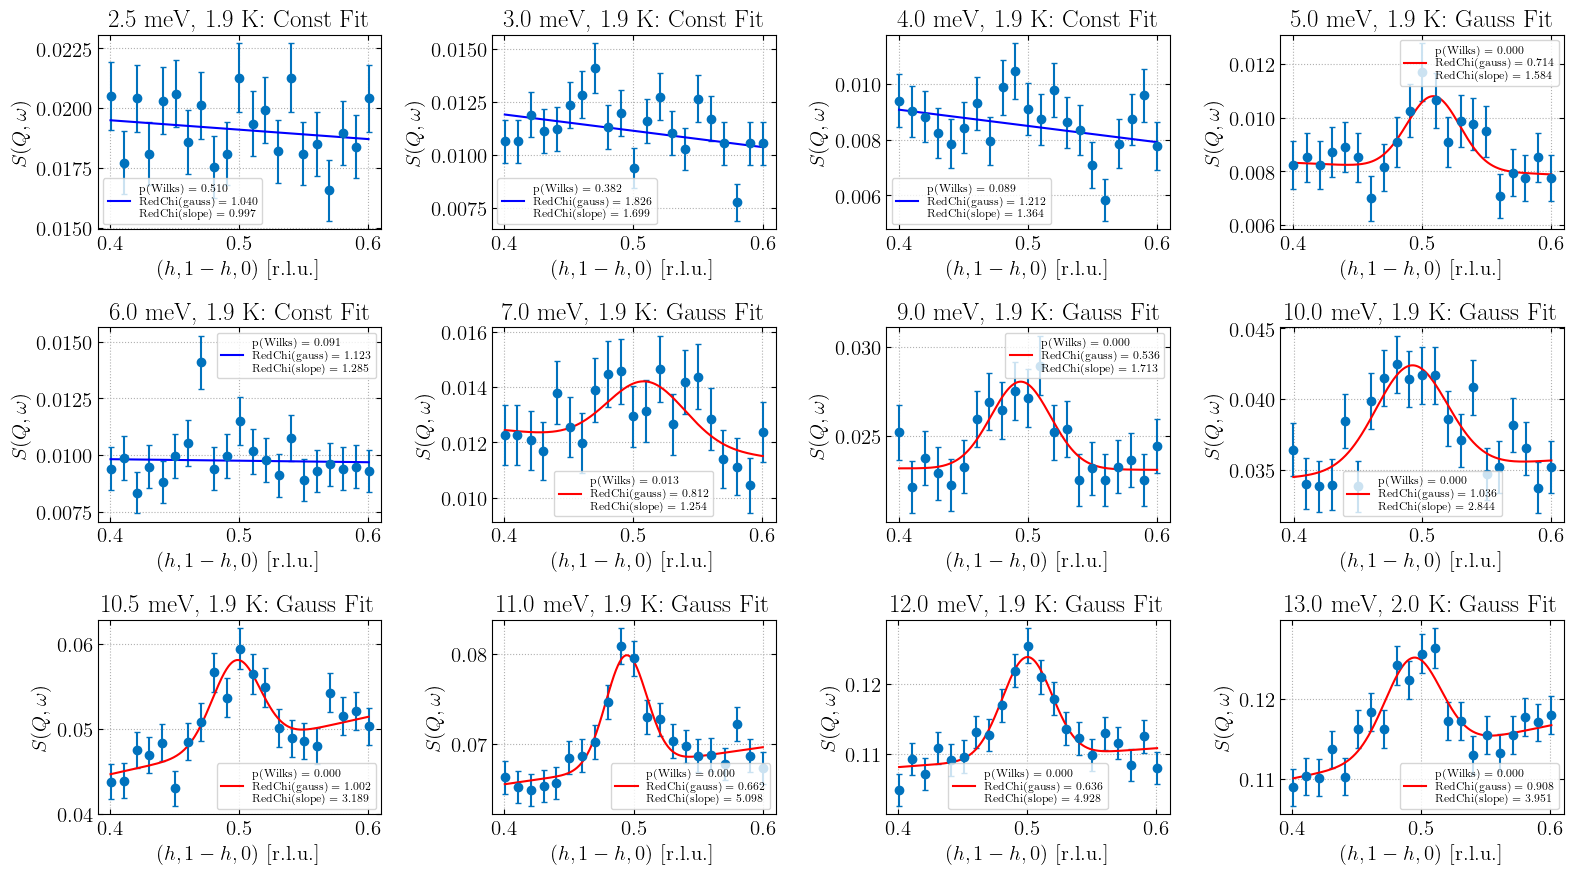

/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:301: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


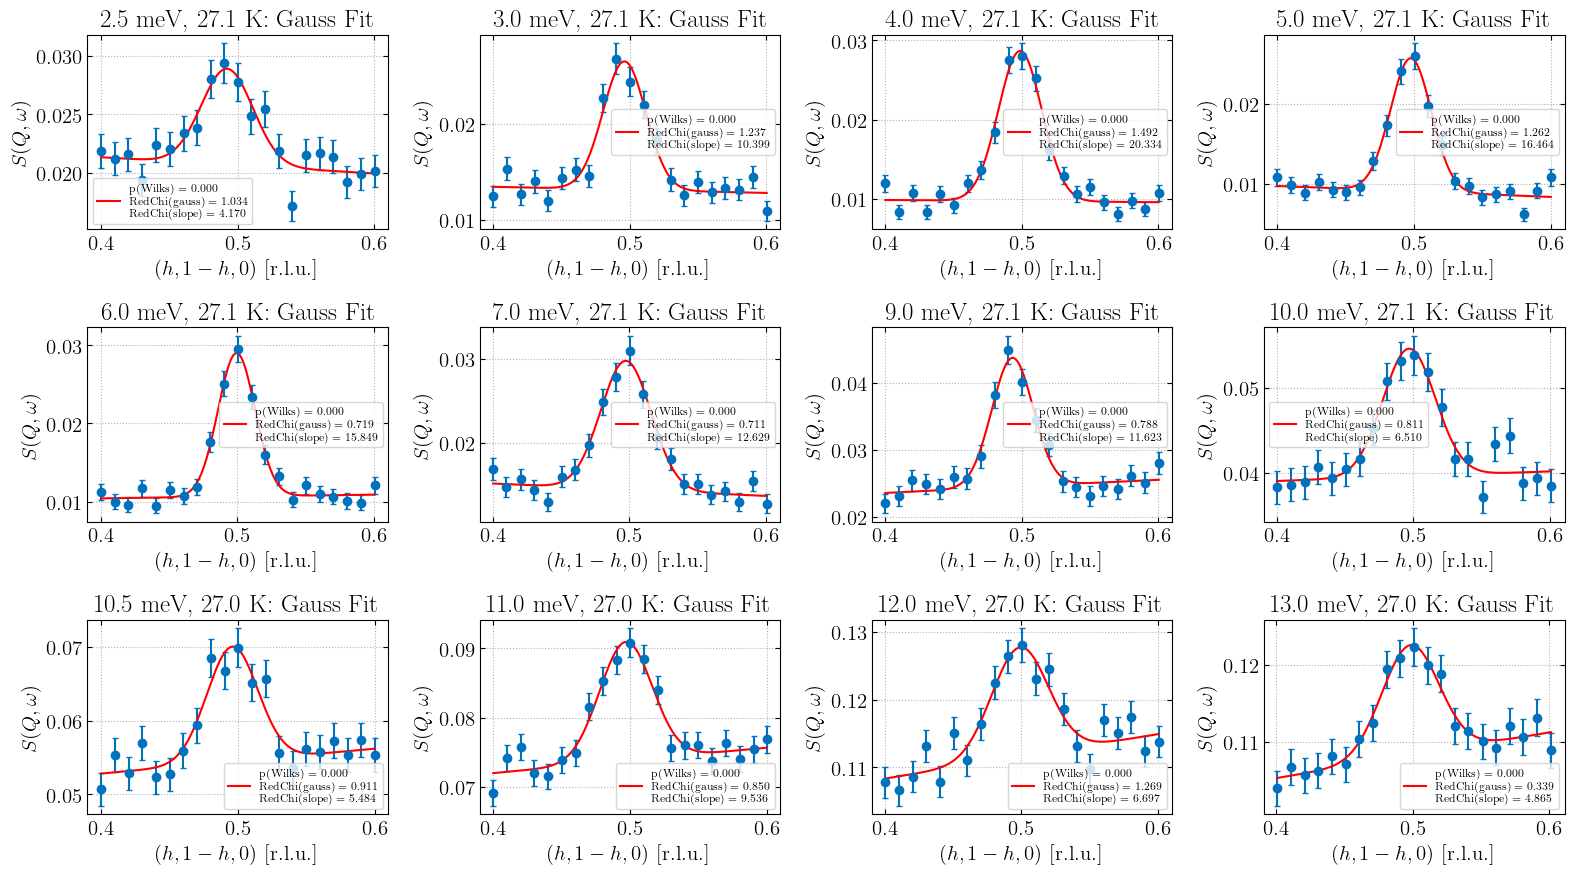

/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:301: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


In [32]:


############################# Energy scan at 2 K #############################


for i in ag_q_2K:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_ag
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, limits1=gauss_limits, initial_guess2=C_geuss)
    #print(i.best_fit_obj.hesse())

plot_fits(ag_q_2K, sample='AG_2K')

############################# Energy scan at 27 K #############################


for i in ag_q_27K:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_ag
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, initial_guess2=C_geuss, limits1=gauss_limits)

plot_fits(ag_q_27K,sample='AG_27K')

############################# Temperature scan at 2 meV #############################

for i in ag_q_2mev:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_ag
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, initial_guess2=C_geuss, limits1=gauss_limits)

############################# Temperature scan at 8 meV #############################

for i in ag_q_8mev:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_ag
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, initial_guess2=C_geuss, limits1=gauss_limits)

for i in ag_cross_points:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_ag
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, initial_guess2=C_geuss, limits1=gauss_limits)

############################# SC sampel #############################

for i in sc_q_scans_27K:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I
    i.calc_SQ
    i.calc_Chi
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, initial_guess2=C_geuss, limits1=gauss_limits)


for i in sc_q_scans_2K:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I
    i.calc_SQ
    i.calc_Chi
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, initial_guess2=C_geuss, limits1=gauss_limits)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


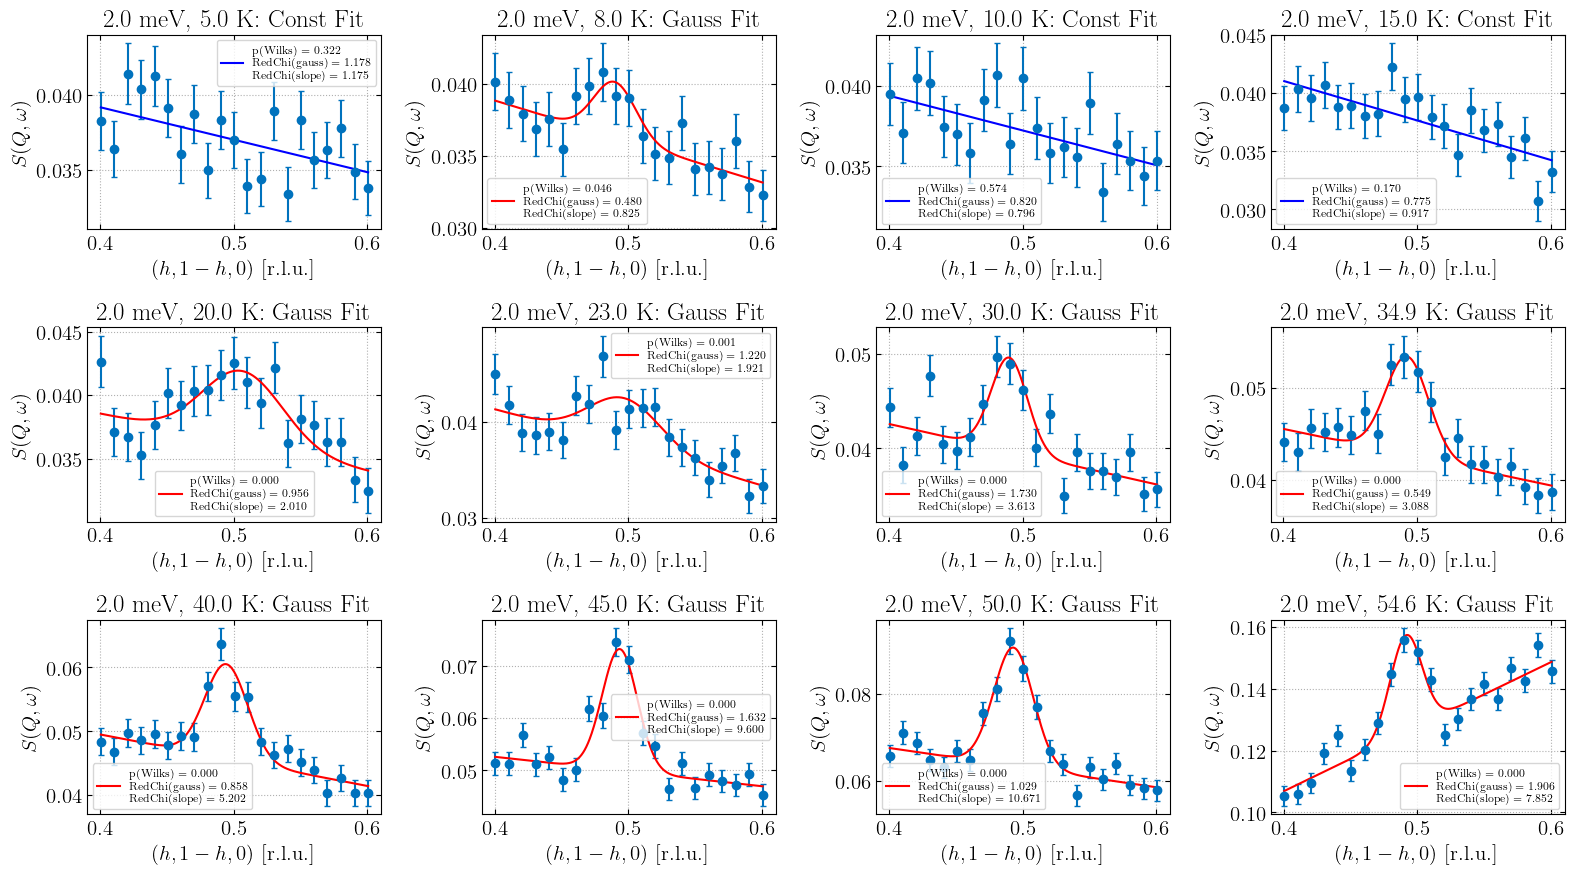

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


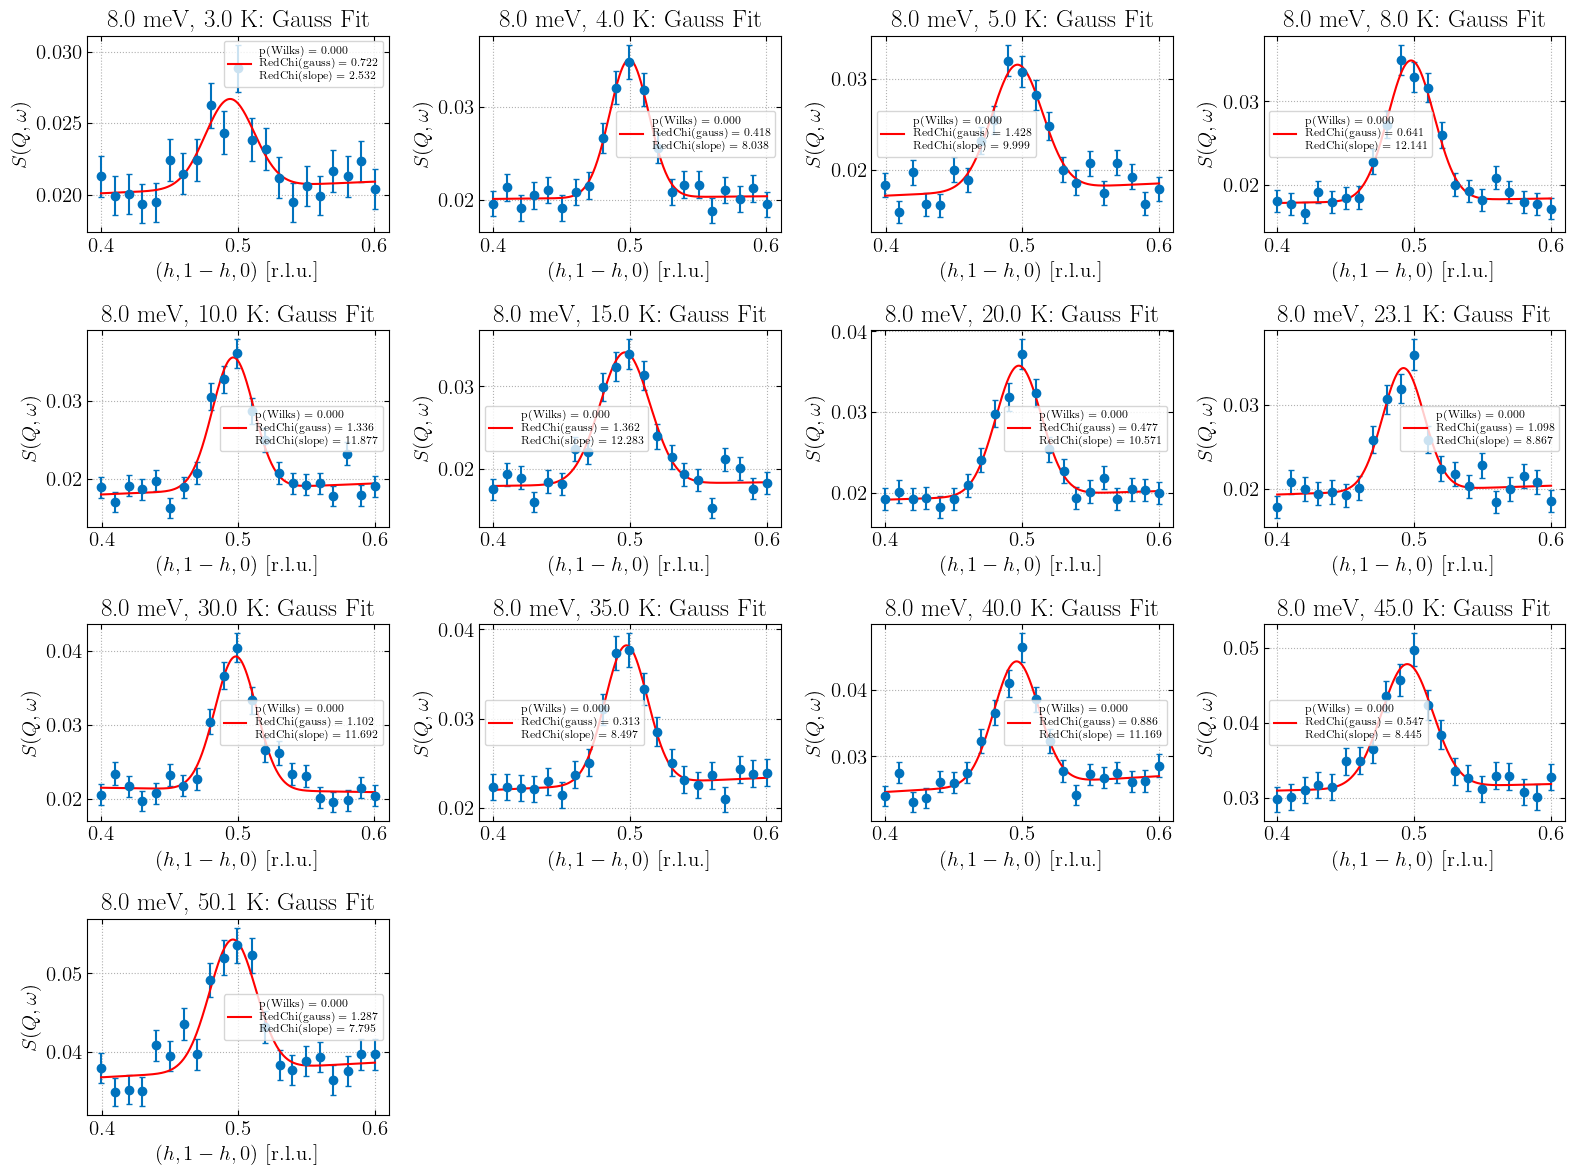

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


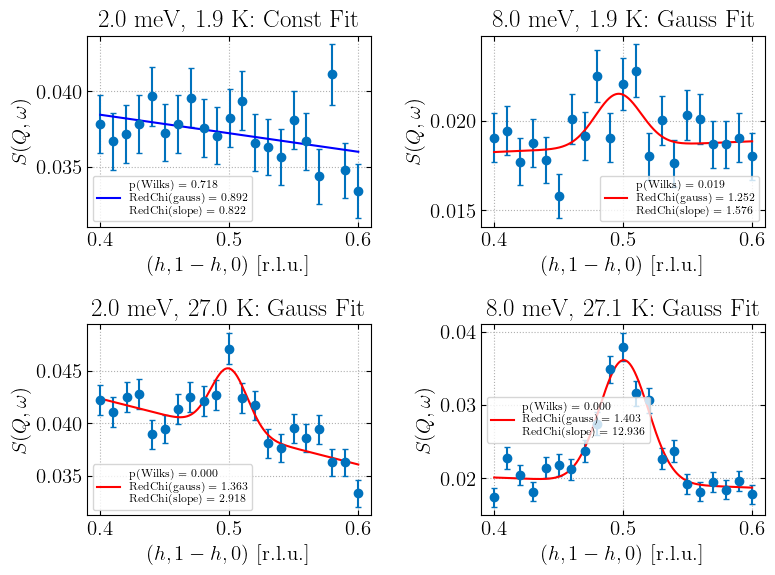

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


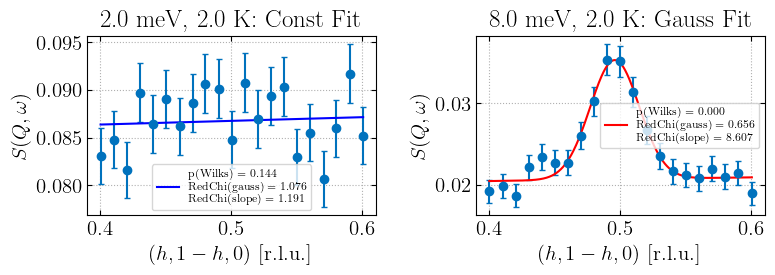

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


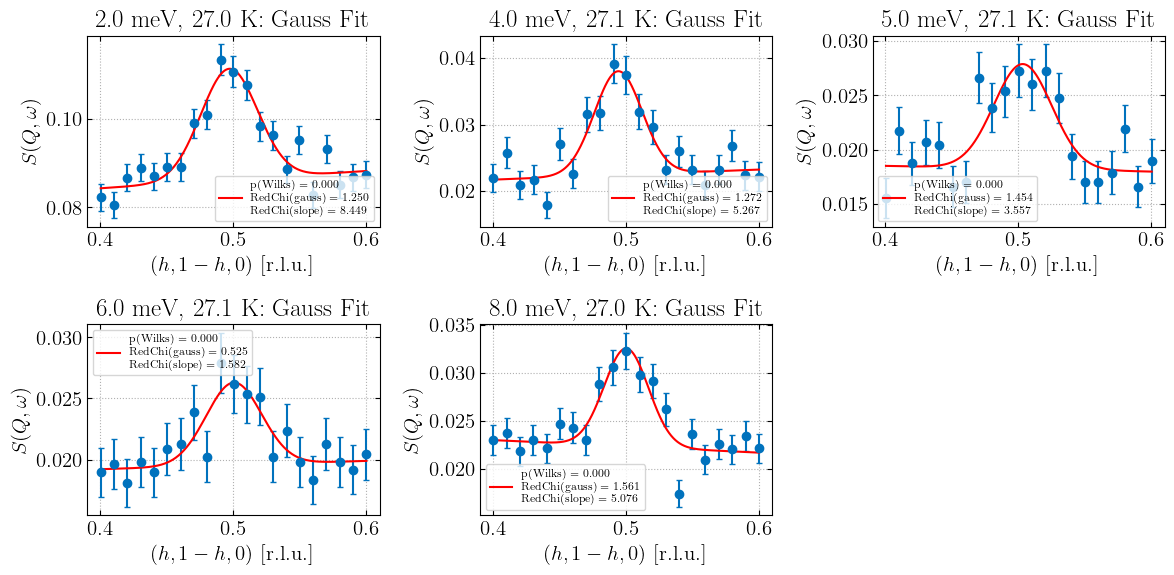

In [33]:
plot_fits(ag_q_2mev, sample='AG_2meV')

plot_fits(ag_q_8mev, sample='AG_8mev')

plot_fits(ag_cross_points, sample='AG_cross_points')

plot_fits(sc_q_scans_2K, sample='SC_2K')
 
plot_fits(sc_q_scans_27K, sample='SC_27K')

In [34]:
area_ag_2mev, area_err_ag_2mev  = PlotGaussArea(ag_q_2mev, x_attr='TT', title='AG: $\Delta E =$2 meV')

area_ag_8mev, area_err_ag_8mev  = PlotGaussArea(ag_q_8mev, x_attr='TT', title='AG: $\Delta E =$8 meV')

area_ag_2K, area_err_ag_2K = PlotGaussArea(ag_q_2K, x_attr='EN', title='AG: $T =$2 K')

area_ag_27K, area_err_ag_27K   = PlotGaussArea(ag_q_27K, x_attr='EN', title='AG: $T =$27 K')

area_ag_cross, area_err_ag_cross   = PlotGaussArea(ag_cross_points, x_attr='EN', title='AG: cross')

area_sc_scan_2K, area_err_sc_scan_2K = PlotGaussArea(sc_q_scans_2K, x_attr='EN', title='AG: $T =$2 K')

area_sc_scan_27K, area_err_sc_scan_27K   = PlotGaussArea(sc_q_scans_27K, x_attr='EN', title='AG: $T =$27 K')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/70872121.py:1: SyntaxWarning: invalid escape sequence '\D'
  area_ag_2mev, area_err_ag_2mev  = PlotGaussArea(ag_q_2mev, x_attr='TT', title='AG: $\Delta E =$2 meV')
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/70872121.py:3: SyntaxWarning: invalid escape sequence '\D'
  area_ag_8mev, area_err_ag_8mev  = PlotGaussArea(ag_q_8mev, x_attr='TT', title='AG: $\Delta E =$8 meV')


In [35]:
sigma_ag_2mev, sigma_err_ag_2mev  = PlotGaussSigma(ag_q_2mev, x_attr='TT', title='AG: $\Delta E =$2 meV')

sigma_ag_8mev, sigma_err_ag_8mev  = PlotGaussSigma(ag_q_8mev, x_attr='TT', title='AG: $\Delta E =$8 meV')

sigma_ag_2K, sigma_err_ag_2K = PlotGaussSigma(ag_q_2K, x_attr='EN', title='AG: $T =$2 K')

sigma_ag_27K, sigma_err_ag_27K   = PlotGaussSigma(ag_q_27K, x_attr='EN', title='AG: $T =$27 K')

sigma_ag_cross, sigma_err_ag_cross   = PlotGaussSigma(ag_cross_points, x_attr='EN', title='AG: cross')

sigma_sc_scan_2K, sigma_err_sc_scan_2K = PlotGaussSigma(sc_q_scans_2K, x_attr='EN', title='SC: $T =$2 K')

sigma_sc_scan_27K, sigma_err_sc_scan_27K   = PlotGaussSigma(sc_q_scans_27K, x_attr='EN', title='SC: $T =$27 K')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/364734188.py:1: SyntaxWarning: invalid escape sequence '\D'
  sigma_ag_2mev, sigma_err_ag_2mev  = PlotGaussSigma(ag_q_2mev, x_attr='TT', title='AG: $\Delta E =$2 meV')
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/364734188.py:3: SyntaxWarning: invalid escape sequence '\D'
  sigma_ag_8mev, sigma_err_ag_8mev  = PlotGaussSigma(ag_q_8mev, x_attr='TT', title='AG: $\Delta E =$8 meV')


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/4156265673.py:1: SyntaxWarning: invalid escape sequence '\D'
  plot_fit_parameters(ag_q_2mev, x_attr='TT', title='AG: $\Delta E =$2 meV')
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/4156265673.py:3: SyntaxWarning: invalid escape sequence '\D'
  plot_fit_parameters(ag_q_8mev, x_attr='TT', title='AG: $\Delta E =$8 meV')


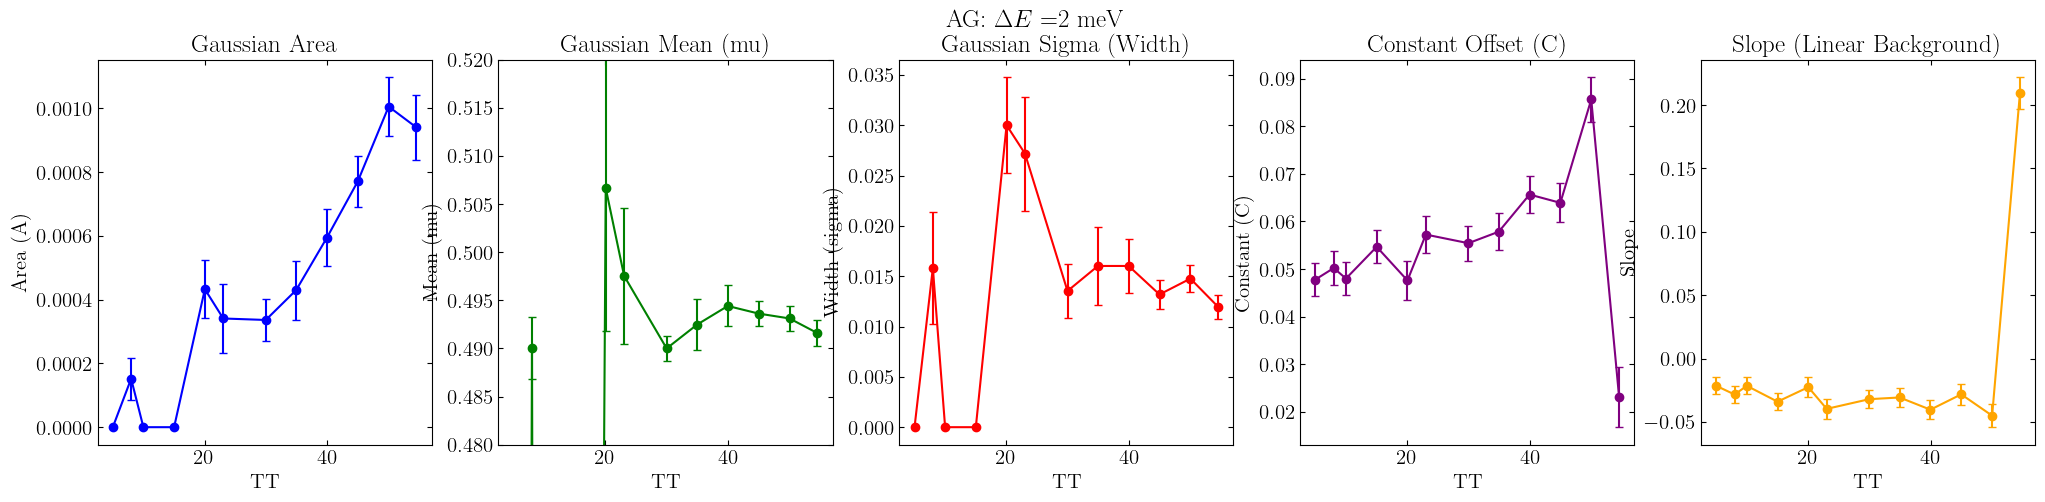

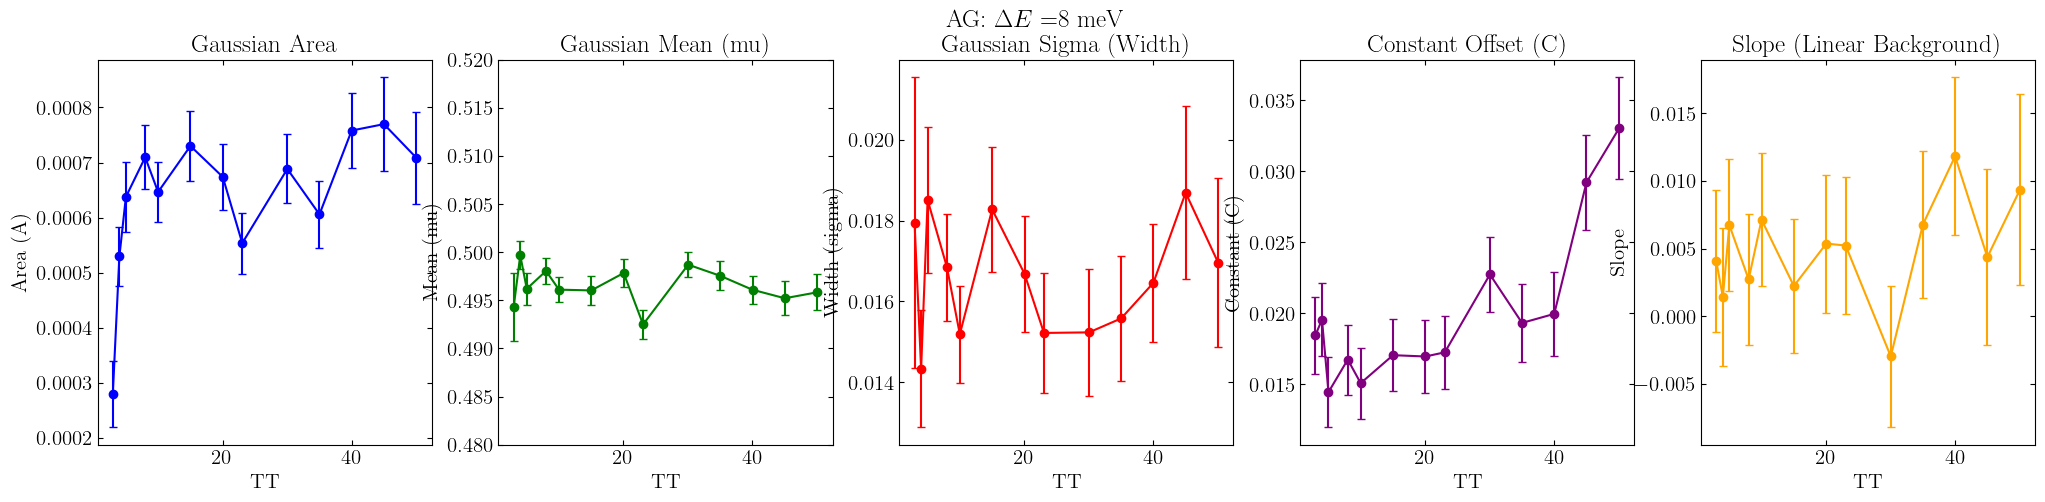

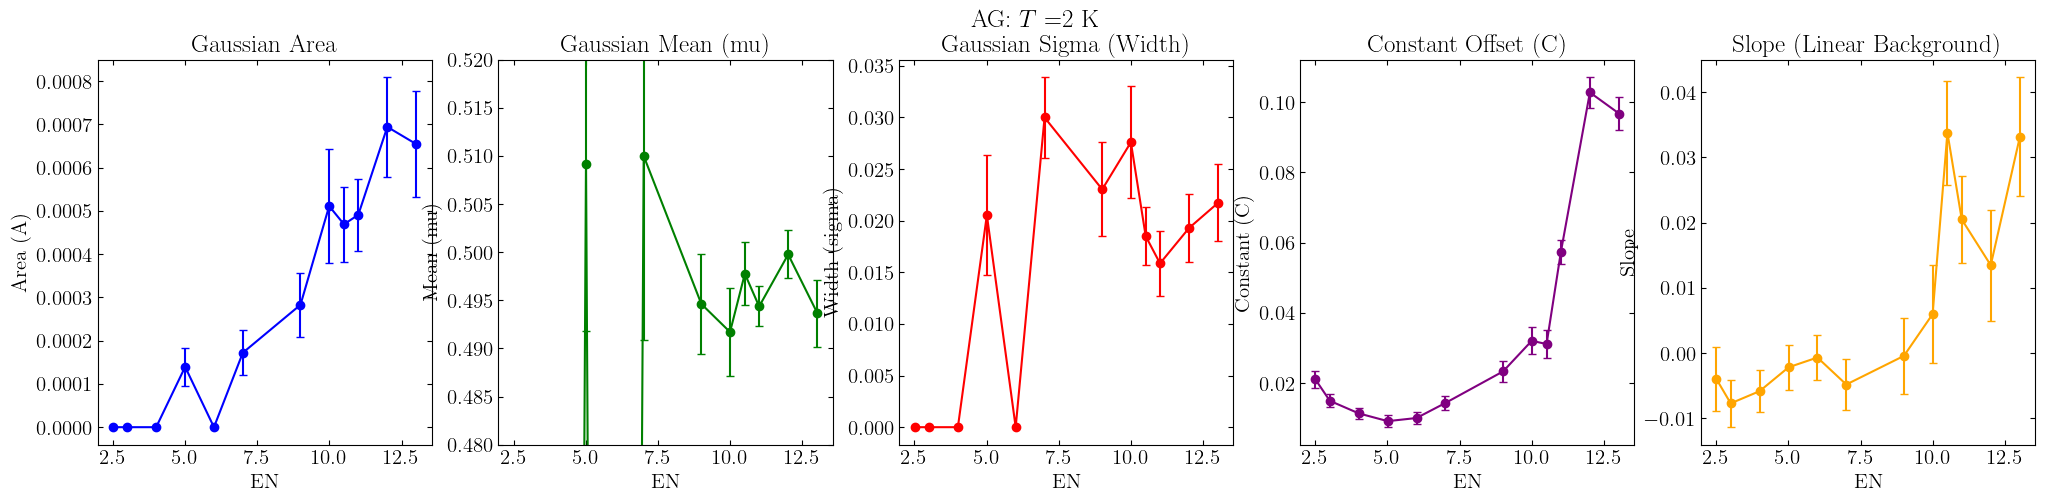

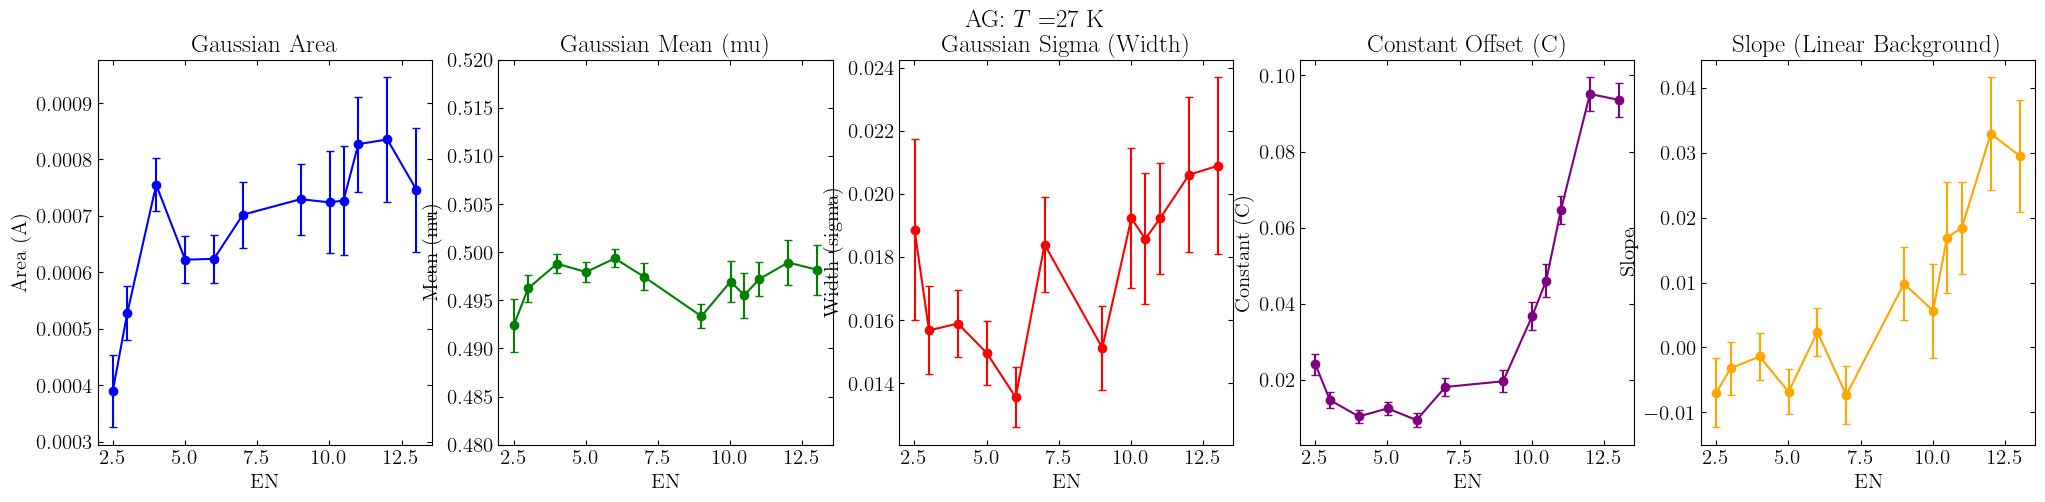

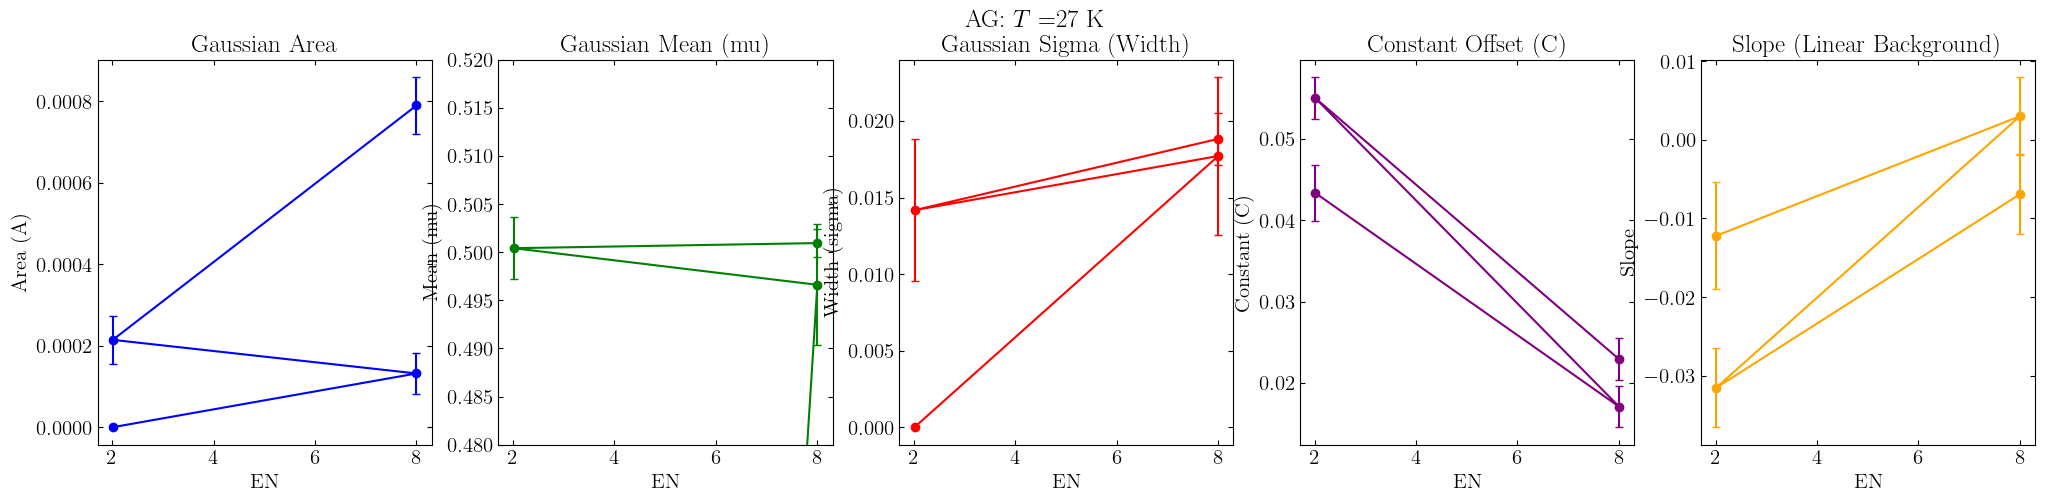

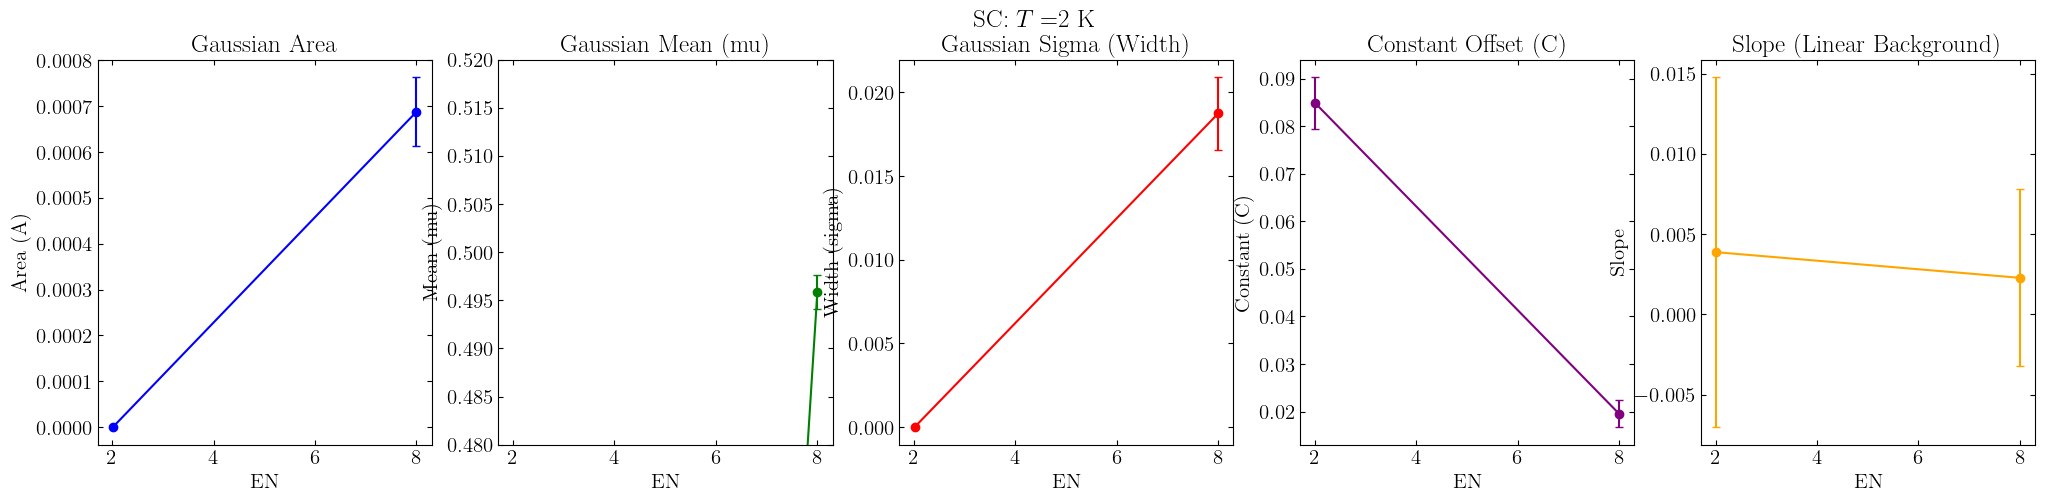

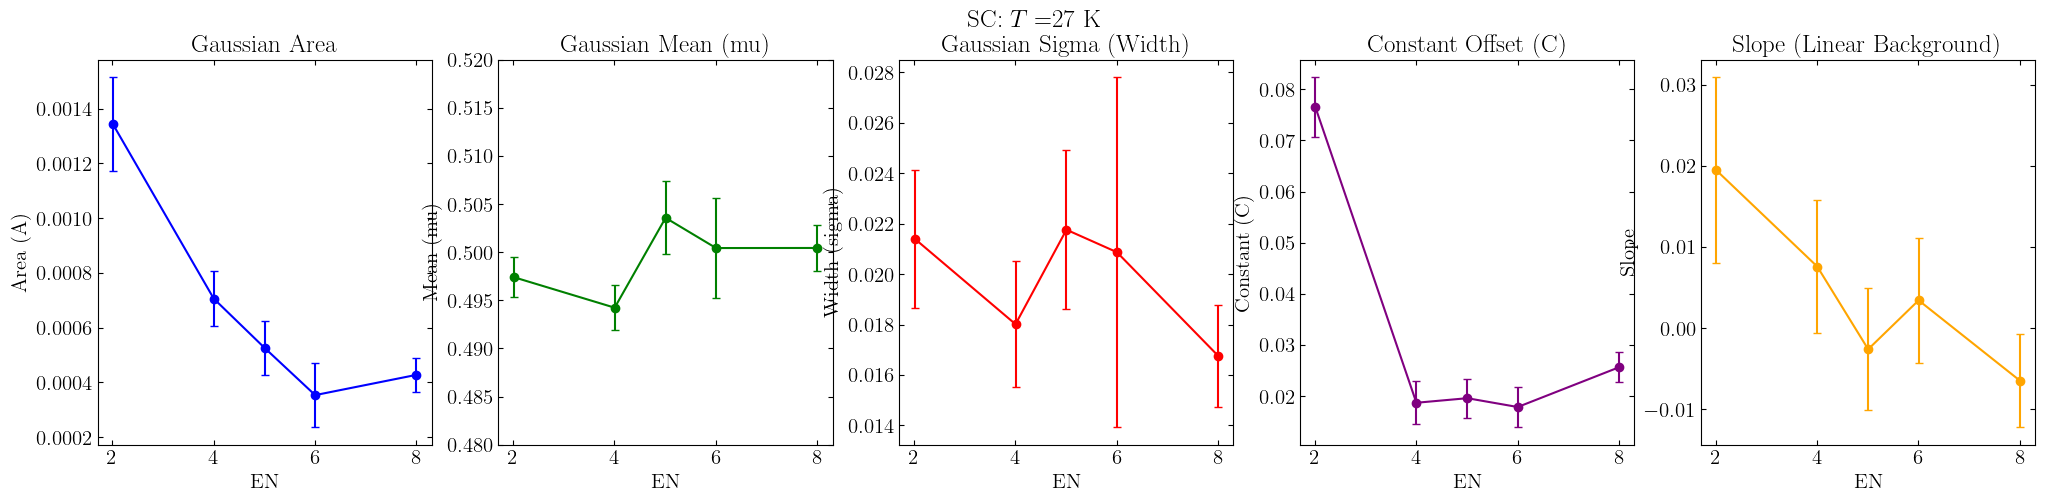

In [36]:
plot_fit_parameters(ag_q_2mev, x_attr='TT', title='AG: $\Delta E =$2 meV')

plot_fit_parameters(ag_q_8mev, x_attr='TT', title='AG: $\Delta E =$8 meV')

plot_fit_parameters(ag_q_2K, x_attr='EN', title='AG: $T =$2 K')

plot_fit_parameters(ag_q_27K, x_attr='EN', title='AG: $T =$27 K')

plot_fit_parameters(ag_cross_points, x_attr='EN', title='AG: $T =$27 K')

plot_fit_parameters(sc_q_scans_2K, x_attr='EN', title='SC: $T =$2 K')

plot_fit_parameters(sc_q_scans_27K, x_attr='EN', title='SC: $T =$27 K')

### What is the average sigma across all q-scans in AG

In [37]:
all_sigmas_ag = sigma_ag_2K + sigma_ag_27K + sigma_ag_2mev + sigma_ag_8mev + sigma_sc_scan_2K + sigma_sc_scan_27K + sigma_ag_cross
all_sigma_errs_ag = sigma_err_ag_2K + sigma_err_ag_27K + sigma_err_ag_2mev + sigma_err_ag_8mev + sigma_err_sc_scan_2K + sigma_err_sc_scan_27K + sigma_err_ag_cross

sigmas = []
sigma_errs = []

for i in range(len(all_sigmas_ag)):
    if all_sigmas_ag[i] != 0:
        sigmas.append(all_sigmas_ag[i])
        sigma_errs.append(all_sigma_errs_ag[i])
    else:
        abk=0

weights = 1 / np.asarray(sigma_errs)**2

mean_sigmas = np.average(np.asarray(sigmas), weights=weights)

mean_sigma_errs = np.sqrt(1 / np.sum(weights))

print(mean_sigmas)
print(mean_sigma_errs)

# Used to detemine the approx area under the 3-point scans. 


0.016272931920255446
0.0002586569922677574


### converting p3 scans amplitude to area.

In [38]:
sc_p3_area_27K, sc_p3_area_err_27K = PointAmpToArea(sc_p3_scans_27K, mean_sigmas, mean_sigma_errs)

sc_p3_area_2K, sc_p3_area_err_2K = PointAmpToArea(sc_p3_scans_2K, mean_sigmas, mean_sigma_errs) 

sc_p3_area_2mev, sc_p3_area_err_2mev = PointAmpToArea(sc_p3_scans_2meV, mean_sigmas, mean_sigma_errs)

sc_p3_area_8mev, sc_p3_area_err_8mev = PointAmpToArea(sc_p3_scans_8meV, mean_sigmas, mean_sigma_errs)

sc_p3_area_cross, sc_p3_area_err_cross = PointAmpToArea(sc_p3_scans_cross, mean_sigmas, mean_sigma_errs)



# Article plots

## Raw Q_scans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


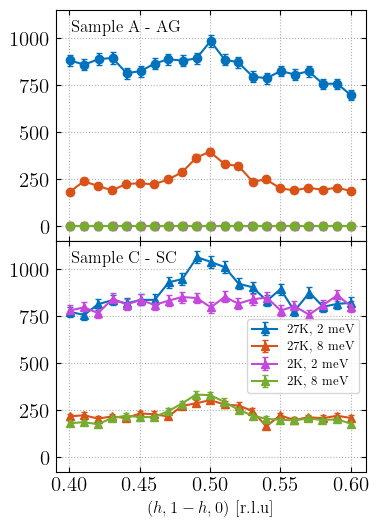

In [39]:
fig, ax = plt.subplots(2,1,figsize=(4,6), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)

#27 K
ax[0].errorbar(ag_q_27K_2mev.QK, ag_q_27K_2mev.CNT, capsize = 2, yerr = ag_q_27K_2mev.CNT_err, fmt = 'o-', label = '27 K, 2 meV')
ax[0].errorbar(ag_q_27K_8mev.QK, ag_q_27K_8mev.CNT, capsize = 2, yerr = ag_q_27K_8mev.CNT_err, fmt = 'o-', label = '27 K, 8 meV')
# 2 K
ax[0].errorbar(ag_q_2K_2mev.QK, ag_q_2K_2mev.I, capsize = 2, yerr = ag_q_2K_2mev.CNT_err, fmt = 'o-', label = '2K, 2 meV')
ax[0].errorbar(ag_q_2K_8mev.QK, ag_q_2K_8mev.I, capsize = 2, yerr = ag_q_2K_8mev.CNT_err, fmt = 'o-', label = '2K, 8 meV')
# ax[0].set_yticks([0, 50, 100, 150, 200, 250])

ax[0].grid(linestyle='dotted')

#27 K
ax[1].errorbar(sc_q_27K_2mev.QK, sc_q_27K_2mev.CNT, capsize = 2, yerr = sc_q_27K_2mev.CNT_err, fmt = '^-', label = '27K, 2 meV')
ax[1].errorbar(sc_q_27K_8mev.QK, sc_q_27K_8mev.CNT, capsize = 2, yerr = sc_q_27K_8mev.CNT_err, fmt = '^-', label = '27K, 8 meV')
#2 K
ax[1].errorbar(sc_q_2K_2mev.QK, sc_q_2K_2mev.CNT, capsize = 2, yerr = sc_q_2K_2mev.CNT_err, fmt = '^-', label = '2K, 2 meV')
ax[1].errorbar(sc_q_2K_8mev.QK, sc_q_2K_8mev.CNT, capsize = 2, yerr = sc_q_2K_8mev.CNT_err, fmt = '^-', label = '2K, 8 meV')

ax[1].set_xlabel('$(h,1-h,0)$ [r.l.u]', fontsize=12)
#ax[1].set_yticks([0, 50, 100, 150, 200])
ax[1].set_xticks([0.4, 0.45, 0.5, 0.55, 0.6])
ax[1].grid(linestyle='dotted')
fig.text(0.05, 1.95, 'Sample A - AG', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
fig.text(0.05, 0.95, 'Sample C - SC', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
ax[1].legend(fontsize=9)

#plt.xlim(0.4,0.6)
#fig.text(-0.01, 0.5, r'$\Tilde{I}(\mathbf{Q},\omega)$ [counts/mon]', va='center', rotation='vertical', fontsize=12)
plt.savefig('Figures_eps/IN20/Raw_scans.eps', format='eps',bbox_inches='tight')
plt.savefig('Figures_png/IN20/Raw_scans.png', format='png',bbox_inches='tight')

<>:31: SyntaxWarning: invalid escape sequence '\o'
<>:31: SyntaxWarning: invalid escape sequence '\o'
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/3132363004.py:31: SyntaxWarning: invalid escape sequence '\o'
  fig.text(-0.01, 0.5, '$S (Q, \omega) $', va='center', rotation='vertical')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


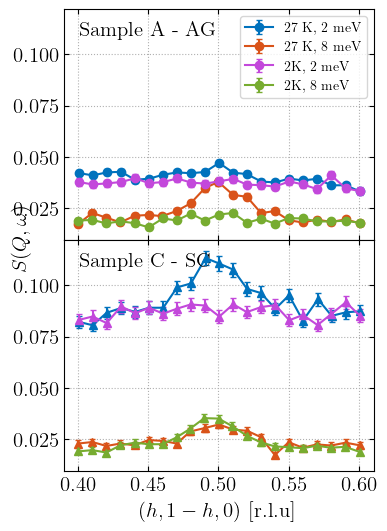

In [40]:
fig, ax = plt.subplots(2,1,figsize=(4,6), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)

#27 K
ax[0].errorbar(ag_q_27K_2mev.QK, ag_q_27K_2mev.SQ, capsize = 2, yerr = ag_q_27K_2mev.SQ_err, fmt = 'o-', label = '27 K, 2 meV')
ax[0].errorbar(ag_q_27K_8mev.QK, ag_q_27K_8mev.SQ, capsize = 2, yerr = ag_q_27K_8mev.SQ_err, fmt = 'o-', label = '27 K, 8 meV')
# 2 K
ax[0].errorbar(ag_q_2K_2mev.QK, ag_q_2K_2mev.SQ, capsize = 2, yerr = ag_q_2K_2mev.SQ_err, fmt = 'o-', label = '2K, 2 meV')
ax[0].errorbar(ag_q_2K_8mev.QK, ag_q_2K_8mev.SQ, capsize = 2, yerr = ag_q_2K_8mev.SQ_err, fmt = 'o-', label = '2K, 8 meV')
# ax[0].set_yticks([0, 50, 100, 150, 200, 250])
ax[0].legend(fontsize=10)
ax[0].grid(linestyle='dotted')


#27 K
ax[1].errorbar(sc_q_27K_2mev.QK, sc_q_27K_2mev.SQ, capsize = 2, yerr = sc_q_27K_2mev.SQ_err, fmt = '^-', label = '27K, 2 meV')
ax[1].errorbar(sc_q_27K_8mev.QK, sc_q_27K_8mev.SQ, capsize = 2, yerr = sc_q_27K_8mev.SQ_err, fmt = '^-', label = '27K, 8 meV')
#2 K
ax[1].errorbar(sc_q_2K_2mev.QK, sc_q_2K_2mev.SQ, capsize = 2, yerr = sc_q_2K_2mev.SQ_err, fmt = '^-', label = '2K, 2 meV')
ax[1].errorbar(sc_q_2K_8mev.QK, sc_q_2K_8mev.SQ, capsize = 2, yerr = sc_q_2K_8mev.SQ_err, fmt = '^-', label = '2K, 8 meV')

ax[1].set_xlabel('$(h,1-h,0)$ [r.l.u]')
#ax[1].set_yticks([0, 50, 100, 150, 200])
ax[1].set_xticks([0.4, 0.45, 0.5, 0.55, 0.6])
ax[1].grid(linestyle='dotted')
fig.text(0.05, 1.95, 'Sample A - AG', transform=plt.gca().transAxes, verticalalignment='top')
fig.text(0.05, 0.95, 'Sample C - SC', transform=plt.gca().transAxes, verticalalignment='top')


#plt.xlim(0.4,0.6)
fig.text(-0.01, 0.5, '$S (Q, \omega) $', va='center', rotation='vertical')
plt.savefig('Figures_eps/IN20/Raw_scans.eps', format='eps',bbox_inches='tight')
plt.savefig('Figures_png/IN20/Raw_scans.png', format='png',bbox_inches='tight')

In [41]:
print(ag_q_27K_2mev.QK)
print(ag_q_27K_2mev.QH)

[0.4006 0.4107 0.4209 0.4308 0.4408 0.4508 0.4607 0.4704 0.4808 0.4905
 0.5005 0.5105 0.5201 0.5305 0.5404 0.5503 0.5602 0.5701 0.5803 0.5905
 0.6005]
[0.5997 0.5897 0.5798 0.5696 0.5597 0.5498 0.5396 0.53   0.5198 0.5099
 0.5    0.4899 0.4796 0.4694 0.4593 0.4498 0.4398 0.4297 0.4193 0.4094
 0.3994]


## Energy and temperature dependence

### Extract object info - SC

In [42]:
amp_sc_p3_27K = [obj.amp for obj in sc_p3_scans_27K]
amp_err_sc_p3_27K = [obj.amp_err for obj in sc_p3_scans_27K]
EN_sc_p3_27K = [obj.EN for obj in sc_p3_scans_27K]

amp_sc_p3_2K = [obj.amp for obj in sc_p3_scans_2K]
amp_err_sc_p3_2K = [obj.amp_err for obj in sc_p3_scans_2K]
EN_sc_p3_2K = [obj.EN for obj in sc_p3_scans_2K]

amp_sc_p3_2mev = [obj.amp for obj in sc_p3_scans_2meV]
amp_err_sc_p3_2mev = [obj.amp_err for obj in sc_p3_scans_2meV]
TT_sc_p3_2mev = [obj.TT for obj in sc_p3_scans_2meV]

amp_sc_p3_8mev = [obj.amp for obj in sc_p3_scans_8meV]
amp_err_sc_p3_8mev = [obj.amp_err for obj in sc_p3_scans_8meV]
TT_sc_p3_8mev = [obj.TT for obj in sc_p3_scans_8meV]

amp_sc_p3_cross = [obj.amp for obj in sc_p3_scans_cross]
amp_err_sc_p3_cross = [obj.amp_err for obj in sc_p3_scans_cross]
TT_sc_p3_cross = [obj.TT for obj in sc_p3_scans_cross]

################### combining with the cross points #################
# sc_p3_scans_cross = [sc_tre_2K_2mev, sc_tre_2K_8mev, sc_tre_27K_2mev, sc_tre_27K_8mev]
# sc_p3_area_27K, sc_p3_area_err_27K


sc_p3_area_27K = sc_p3_area_27K + [np.asarray(sc_p3_area_cross)[-2]] + [np.asarray(sc_p3_area_cross)[-1]]
sc_p3_area_2K = sc_p3_area_2K + [np.asarray(sc_p3_area_cross)[0]] + [np.asarray(sc_p3_area_cross)[1]]
sc_p3_area_2mev = sc_p3_area_2mev + [np.asarray(sc_p3_area_cross)[0]] + [np.asarray(sc_p3_area_cross)[2]]
sc_p3_area_8mev = sc_p3_area_8mev + [np.asarray(sc_p3_area_cross)[1]] + [np.asarray(sc_p3_area_cross)[3]]


sc_p3_area_err_27K = sc_p3_area_err_27K + [np.asarray(sc_p3_area_err_cross)[-2]] + [np.asarray(sc_p3_area_err_cross)[-1]]
sc_p3_area_err_2K = sc_p3_area_err_2K + [np.asarray(sc_p3_area_err_cross)[0]] + [np.asarray(sc_p3_area_err_cross)[1]]
sc_p3_area_err_2mev = sc_p3_area_err_2mev + [np.asarray(sc_p3_area_err_cross)[0]] + [np.asarray(sc_p3_area_err_cross)[2]]
sc_p3_area_err_8mev = sc_p3_area_err_8mev + [np.asarray(sc_p3_area_err_cross)[1]] + [np.asarray(sc_p3_area_err_cross)[3]]

EN_sc_p3_27K = EN_sc_p3_27K + [sc_tre_27K_2mev.EN] +  [sc_tre_27K_8mev.EN]
EN_sc_p3_2K = EN_sc_p3_2K + [sc_tre_2K_2mev.EN] +  [sc_tre_2K_8mev.EN]
TT_sc_p3_2mev = TT_sc_p3_2mev + [sc_tre_2K_2mev.TT] + [sc_tre_27K_2mev.TT]
TT_sc_p3_8mev = TT_sc_p3_8mev + [sc_tre_2K_8mev.TT] + [sc_tre_27K_8mev.TT]

sorted_data_SC_27K = sorted(zip(EN_sc_p3_27K, sc_p3_area_27K, sc_p3_area_err_27K))
EN_sc_p3_27K, sc_p3_area_27K, sc_p3_area_err_27K = zip(*sorted_data_SC_27K)

sorted_data_SC_2K = sorted(zip(EN_sc_p3_2K, sc_p3_area_2K, sc_p3_area_err_2K))
EN_sc_p3_2K, sc_p3_area_2K, sc_p3_area_err_2K = zip(*sorted_data_SC_2K)

sorted_data_SC_2mev = sorted(zip(TT_sc_p3_2mev, sc_p3_area_2mev, sc_p3_area_err_2mev))
TT_sc_p3_2mev, sc_p3_area_2mev, sc_p3_area_err_2mev = zip(*sorted_data_SC_2mev)

sorted_data_SC_8mev = sorted(zip(TT_sc_p3_8mev, sc_p3_area_8mev, sc_p3_area_err_8mev))
TT_sc_p3_8mev, sc_p3_area_8mev, sc_p3_area_err_8mev = zip(*sorted_data_SC_8mev)


### Extract object info - AG

In [43]:
#
# 

A_ag_27K = area_ag_27K
A_err_ag_27K =  area_err_ag_27K
EN_ag_27K = [obj.EN for obj in ag_q_27K]  

A_ag_2K =  area_ag_2K
A_err_ag_2K = area_err_ag_2K
EN_ag_2K = [obj.EN for obj in ag_q_2K]

A_ag_2mev = area_ag_2mev
A_err_ag_2mev = area_err_ag_2mev
TT_ag_2mev = [obj.TT for obj in ag_q_2mev]

A_ag_8mev = area_ag_8mev
A_err_ag_8mev = area_err_ag_8mev
TT_ag_8mev = [obj.TT for obj in ag_q_8mev]

A_ag_cross = area_ag_cross
A_err_ag_cross = area_err_ag_cross

# combining the data to include cross points
A_ag_27K = A_ag_27K + [np.asarray(A_ag_cross)[-2]] + [np.asarray(A_ag_cross)[-1]]
A_ag_2K = A_ag_2K + [np.asarray(A_ag_cross)[0]] + [np.asarray(A_ag_cross)[1]]
A_ag_2mev = A_ag_2mev + [np.asarray(A_ag_cross)[0]] + [np.asarray(A_ag_cross)[2]]
A_ag_8mev = A_ag_8mev + [np.asarray(A_ag_cross)[1]] + [np.asarray(A_ag_cross)[3]]

A_err_ag_27K = A_err_ag_27K + [np.asarray(A_err_ag_cross)[-2]] + [np.asarray(A_err_ag_cross)[-1]]
A_err_ag_2K = A_err_ag_2K + [np.asarray(A_err_ag_cross)[0]] + [np.asarray(A_err_ag_cross)[1]]
A_err_ag_2mev = A_err_ag_2mev + [np.asarray(A_err_ag_cross)[0]] + [np.asarray(A_err_ag_cross)[2]]
A_err_ag_8mev = A_err_ag_8mev + [np.asarray(A_err_ag_cross)[1]] + [np.asarray(A_err_ag_cross)[3]]

EN_ag_27K = EN_ag_27K + [ag_q_27K_2mev.EN] +  [ag_q_27K_8mev.EN]
EN_ag_2K = EN_ag_2K + [ag_q_2K_2mev.EN] +  [ag_q_2K_8mev.EN]
TT_ag_2mev = TT_ag_2mev + [ag_q_2K_2mev.TT] + [ag_q_27K_2mev.TT]
TT_ag_8mev = TT_ag_8mev + [ag_q_2K_8mev.TT] + [ag_q_27K_8mev.TT]

#### Sorting the data
sorted_data_AG_27K = sorted(zip(EN_ag_27K, A_ag_27K, A_err_ag_27K))
EN_ag_27K, A_ag_27K, A_err_ag_27K = zip(*sorted_data_AG_27K)

sorted_data_AG_2K = sorted(zip(EN_ag_2K, A_ag_2K, A_err_ag_2K))
EN_ag_2K, A_ag_2K, A_err_ag_2K = zip(*sorted_data_AG_2K)

sorted_data_AG_2mev = sorted(zip(TT_ag_2mev, A_ag_2mev, A_err_ag_2mev))
TT_ag_2mev, A_ag_2mev, A_err_ag_2mev = zip(*sorted_data_AG_2mev)

sorted_data_AG_8mev = sorted(zip(TT_ag_8mev, A_ag_8mev, A_err_ag_8mev))
TT_ag_8mev, A_ag_8mev, A_err_ag_8mev = zip(*sorted_data_AG_8mev)

################################ SC DATA #########################

# sc_q_scans_27K = [sc_q_27K_2mev, sc_q_27K_4mev, sc_q_27K_5mev, sc_q_27K_6mev, sc_q_27K_8mev]
# sc_q_scans_2K = [sc_q_2K_2mev, sc_q_2K_8mev]
# sc_p3_scans_cross = [sc_tre_2K_2mev, sc_tre_2K_8mev, sc_tre_27K_2mev, sc_tre_27K_8mev]

A_sc_27K = area_sc_scan_27K
A_err_sc_27K =  area_err_sc_scan_27K
EN_sc_27K = [obj.EN for obj in sc_q_scans_27K]

A_sc_2K =  area_sc_scan_2K
A_err_sc_2K = area_err_sc_scan_2K
EN_sc_2K = [obj.EN for obj in sc_q_scans_2K]

# sigma_sc_scan_2K, sigma_err_sc_scan_2K

A_sc_2mev = np.array([area_sc_scan_2K[0], area_sc_scan_27K[0]])
A_err_sc_2mev =  np.array([area_err_sc_scan_2K[0], area_err_sc_scan_27K[0]])
TT_sc_2mev = np.array([sc_q_2K_2mev.TT, sc_q_27K_2mev.TT])

A_sc_8mev = np.array([area_sc_scan_2K[-1], area_sc_scan_27K[-1]])
A_err_sc_8mev =  np.array([area_err_sc_scan_2K[-1], area_err_sc_scan_27K[-1]])
TT_sc_8mev = np.array([sc_q_2K_8mev.TT, sc_q_27K_8mev.TT])

In [44]:
#### GUIDE TO THE EYES USING SPLINE INTERPOLATION
x_temp_ag_2mev = np.linspace(np.min(TT_ag_2mev), np.max(TT_ag_2mev), 100)
x_temp_ag_8mev = np.linspace(np.min(TT_ag_8mev), 20, 100)
x_temp_sc_8mev = np.linspace(np.min(TT_sc_p3_8mev), np.max(TT_sc_p3_8mev), 100)
x_temp_sc_2mev = np.linspace(np.min(TT_sc_p3_2mev), 25, 100)

x_energy_ag_27K = np.linspace(np.min(EN_ag_27K), 7, 100)
x_energy_ag_2K = np.linspace(np.min(EN_ag_27K), np.max(EN_ag_27K), 100)
x_energy_sc_27K = np.linspace(np.min(EN_ag_27K), 13, 100)
x_energy_sc_2K = np.linspace(np.min(EN_ag_27K), np.max(EN_ag_27K), 100)

########################### AG ###########################
# Create a spline interpolator
spline_A_ag_27K = UnivariateSpline(EN_ag_27K, A_ag_27K, s=2)  # s is the smoothing factor
spliney_A_ag_27K = spline_A_ag_27K(x_energy_ag_27K)

spline_A_ag_2K = UnivariateSpline(EN_ag_2K, A_ag_2K, s=2)  # s is the smoothing factor
spliney_A_ag_2K = spline_A_ag_2K(x_energy_ag_2K)

spline_A_ag_2mev = UnivariateSpline(TT_ag_2mev , A_ag_2mev, s=2)  # s is the smoothing factor
spliney_A_ag_2mev = spline_A_ag_2mev(x_temp_ag_2mev)

spline_A_ag_8mev = UnivariateSpline(TT_ag_8mev , A_ag_8mev, s=2)  # s is the smoothing factor
spliney_A_ag_8mev = spline_A_ag_8mev(x_temp_ag_8mev)

########################### SC ###########################

spline_A_sc_27K = UnivariateSpline(EN_sc_p3_27K, sc_p3_area_27K, s=2)  # s is the smoothing factor
spliney_A_sc_27K = spline_A_sc_27K(x_energy_sc_27K)

spline_A_sc_2K = UnivariateSpline(EN_sc_p3_2K, sc_p3_area_2K, s=2)  # s is the smoothing factor
spliney_A_sc_2K = spline_A_sc_2K(x_energy_sc_2K)

spline_A_sc_2mev = UnivariateSpline(TT_sc_p3_2mev , sc_p3_area_2mev, s=2)  # s is the smoothing factor
spliney_A_sc_2mev = spline_A_sc_2mev(x_temp_sc_2mev)

spline_A_sc_8mev = UnivariateSpline(TT_sc_p3_8mev , sc_p3_area_8mev, s=2)  # s is the smoothing factor
spliney_A_sc_8mev = spline_A_sc_8mev(x_temp_sc_8mev)


In [45]:
plt.rcParams.update({
    'figure.figsize': (3.5, 2.5),     # Width x Height in inches for single plots
    'font.size': 10,                  # Base font size
    'axes.labelsize': 10,             # Label font size
    'xtick.labelsize': 8,             # X-axis tick label size
    'ytick.labelsize': 8,             # Y-axis tick label size
    'legend.fontsize': 8,             # Legend font size
    'axes.titlesize': 10,             # Title font size
    'figure.dpi': 300,                # Dots per inch for high-quality output
    'savefig.dpi': 300,
    'font.family': 'serif',    # Use serif font to match many article styles
    'lines.linewidth': 1.5                # DPI for saving figures
})

In [70]:
x_cross_ag =  2.78521
x_cross_ag_err =  0.0984
x_cross_sc =  2.01573
x_cross_sc_err =  0.61360
x_cross_sc_mm =  3.03775
x_cross_sc_mm_err =  0.13078

<>:57: SyntaxWarning: invalid escape sequence '\h'
<>:57: SyntaxWarning: invalid escape sequence '\h'
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/2584493830.py:57: SyntaxWarning: invalid escape sequence '\h'
  ax[1].set_xlabel('$\hbar \omega$ [meV]')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


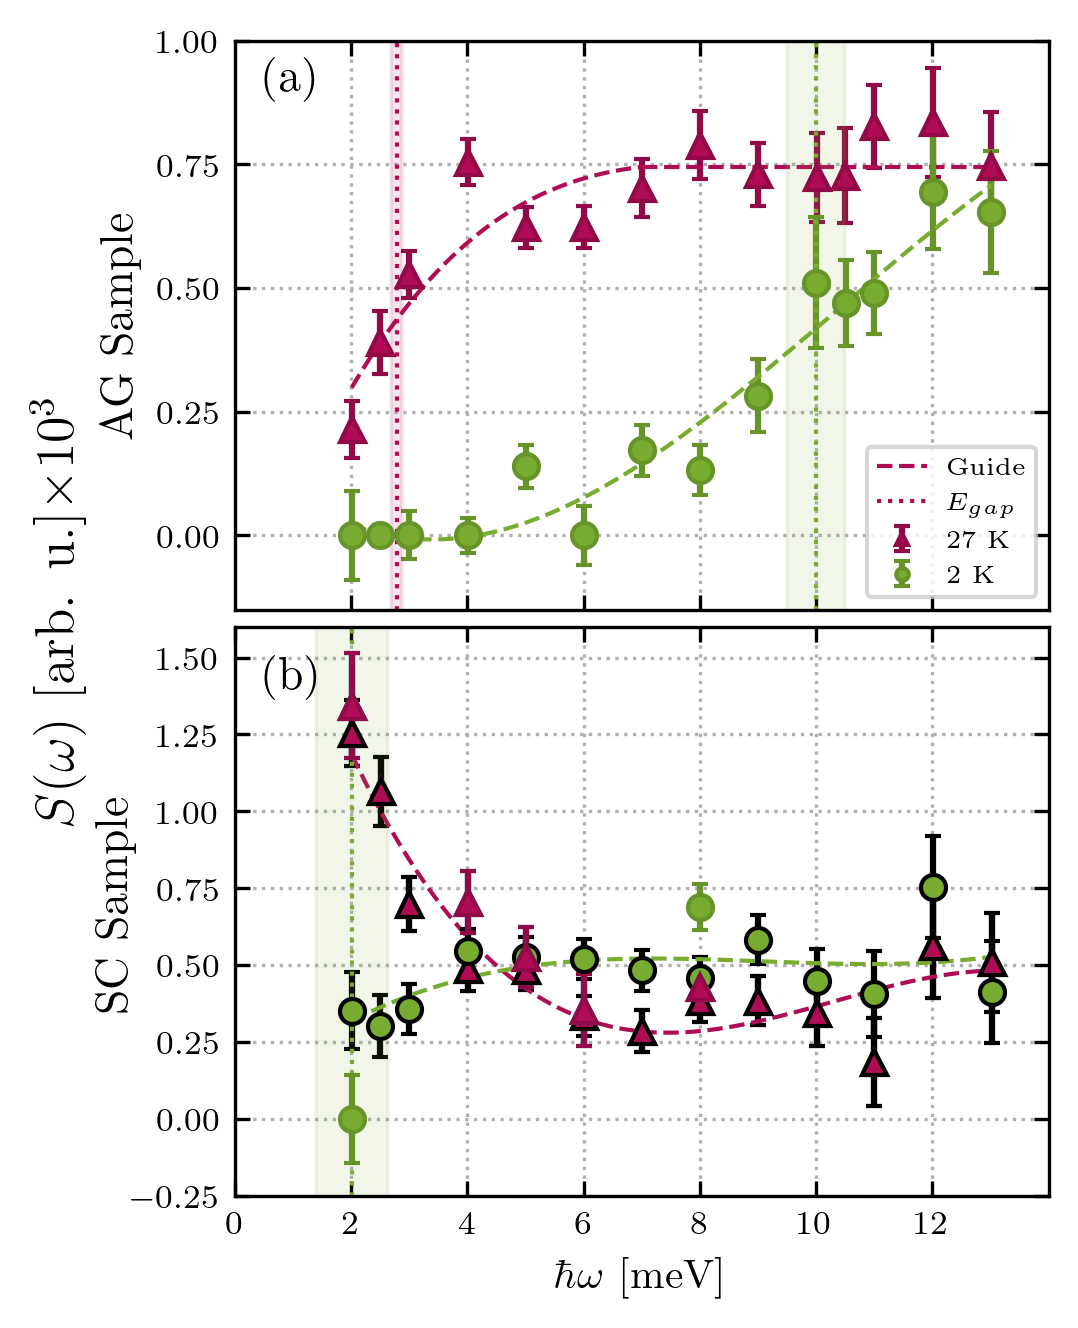

In [87]:
fig, ax = plt.subplots(2, 1, figsize=(3.5, 5))
fig.subplots_adjust(hspace=0.03, wspace=0.05)

ax[1].grid(linestyle='dotted')
ax[0].errorbar(EN_ag_27K, np.asarray(A_ag_27K)*10**(3), capsize=2, yerr=np.asarray(A_err_ag_27K)*10**(3), fmt='^', label='27 K', color='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946')
ax[0].plot(x_energy_ag_27K, spliney_A_ag_27K*10**(3), '--', color='#B00B55', linewidth=1, label='Guide')
ax[0].plot(np.linspace(7,13,100), np.ones(100)*0.74493, '--', color='#B00B55', linewidth=1)

ax[0].errorbar(EN_ag_2K, np.asarray(A_ag_2K)*10**(3), capsize=2, yerr=np.asarray(A_err_ag_2K)*10**(3), fmt='o', label='2 K', color='#77AC30', ecolor='#669428', mew=1, markeredgecolor='#669428')
ax[0].plot(x_energy_ag_2K, spliney_A_ag_2K*10**(3), '--', color='#77AC30', linewidth=1)
ax[0].grid(linestyle='dotted')
ax[0].set_xticks([2, 4, 6, 8, 10, 12])

ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax[0].text(0.5, 0.9, r"(a)", fontsize=11, color="black")
ax[0].plot(np.ones(100)*x_cross_ag, np.linspace(-1, 6, 100), linestyle='dotted', color='#B00B55', linewidth=1, label='$E_{gap}$')
ax[0].fill_betweenx(y=[-0.5, 6], x1=x_cross_ag-x_cross_ag_err, x2=x_cross_ag+x_cross_ag_err,
                 color="#B00B55", alpha=0.1, zorder=2)

ax[0].plot(np.ones(100)*10, np.linspace(-1, 6, 100), linestyle='dotted', color='#77AC30', linewidth=1)
ax[0].fill_betweenx(y=[-0.5, 6], x1=9.5, x2=10.5,
                 color="#77AC30", alpha=0.1, zorder=2)
ax[0].legend(fontsize=6, markerscale=0.5, loc='lower right')
#ax[0].arrow(4, 0.4, 0, 0.1, head_width=0.3, head_length=0.05, fc="#B00B55", ec="black", zorder=5)
#ax[0].arrow(10, 0.2, 0, 0.1, head_width=0.3, head_length=0.05, fc="#77AC30", ec="black", zorder=5)

#ax[0].axvspan(0, 0.4, color='grey', alpha=0.3)  # Slightly transparent grey box

ax[1].errorbar(EN_sc_p3_27K, np.asarray(sc_p3_area_27K)*10**(3), capsize=2, yerr=np.asarray(sc_p3_area_err_27K)*10**(3), fmt='^', label='3-point scan IN20', color='grey')
ax[1].errorbar(EN_sc_p3_27K, np.asarray(sc_p3_area_27K)*10**(3), capsize=2, yerr=np.asarray(sc_p3_area_err_27K)*10**(3), fmt='^', color='#B00B55', ecolor='k', mew=1, markeredgecolor='k')
ax[1].plot(x_energy_sc_27K, spliney_A_sc_27K*10**(3), '--', color='#B00B55', linewidth=1)


ax[1].errorbar(EN_sc_p3_2K, np.asarray(sc_p3_area_2K)*10**(3), capsize=2, yerr=np.asarray(sc_p3_area_err_2K)*10**(3), fmt='o', color='#77AC30', ecolor='k', mew=1, markeredgecolor='k')
ax[1].plot(x_energy_sc_2K, spliney_A_sc_2K*10**(3), '--', color='#77AC30', linewidth=1)
ax[1].plot(np.ones(100)*x_cross_sc, np.linspace(-1, 6, 100), linestyle='dotted', color='#77AC30', linewidth=1)
ax[1].fill_betweenx(y=[-1, 6], x1=x_cross_sc-x_cross_sc_err, x2=x_cross_sc+x_cross_sc_err,
                 color="#77AC30", alpha=0.1, zorder=2)

ax[1].errorbar(EN_sc_27K, np.asarray(A_sc_27K)*10**(3), yerr=np.asarray(A_err_sc_27K)*10**(3), capsize=2, fmt='^', markerfacecolor='grey')
ax[1].errorbar(EN_sc_27K, np.asarray(A_sc_27K)*10**(3), yerr=np.asarray(A_err_sc_27K)*10**(3), capsize=2, fmt='^', markerfacecolor='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946')
ax[1].errorbar(EN_sc_2K, np.asarray(A_sc_2K)*10**(3), yerr=np.asarray(A_err_sc_2K)*10**(3), capsize=2, fmt='o', markerfacecolor='#77AC30',  ecolor='#669428', mew=1, markeredgecolor='#669428')

#ax[1].axvspan(0, 0.4, color='grey', alpha=0.3, label='FWHM IN20')
ax[1].text(0.5, 1.4, r"(b)", fontsize=11, color="black")
ax[1].grid(linestyle='dotted')
ax[1].set_xticks([0, 2, 4, 6, 8, 10, 12])
ax[0].set_xticklabels([])

ax[0].set_ylabel('AG Sample', fontsize=11)
ax[1].text(-2.4, 0.7, r'SC Sample', va='center', rotation='vertical', fontsize=11)
#ax[1].legend(fontsize=6, markerscale=0.5)
ax[0].set_ylim(-0.15,1)
ax[1].set_ylim(-0.25,1.6)
ax[1].set_xlim(0, 14)
ax[0].set_xlim(0, 14)
ax[1].set_xlabel('$\hbar \omega$ [meV]')
fig.text(-0.07, 0.5, r'$ S(\omega)$ [arb. u.]$\times 10^3$', va='center', rotation='vertical', fontsize=13)

plt.savefig('Figures_eps/IN20/E_dependence.eps', format='eps', bbox_inches='tight')
plt.savefig('Figures_png/IN20/E_dependence.png', format='png', bbox_inches='tight')

<>:52: SyntaxWarning: invalid escape sequence '\h'
<>:53: SyntaxWarning: invalid escape sequence '\h'
<>:52: SyntaxWarning: invalid escape sequence '\h'
<>:53: SyntaxWarning: invalid escape sequence '\h'
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/2230746350.py:52: SyntaxWarning: invalid escape sequence '\h'
  ax[1].set_xlabel('$\hbar \omega$ [meV]')
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/2230746350.py:53: SyntaxWarning: invalid escape sequence '\h'
  ax[0].set_xlabel('$\hbar \omega$ [meV]')


[1.18509759 1.14164847 1.09952131 1.05869818 1.01916112 0.9808922
 0.94387346 0.90808697 0.87351479 0.84013896 0.80794155 0.77690461
 0.74701019 0.71824037 0.69057718 0.66400269 0.63849895 0.61404802
 0.59063196 0.56823282 0.54683266 0.52641354 0.5069575  0.48844662
 0.47086294 0.45418851 0.43840541 0.42349568 0.40944138 0.39622456
 0.38382729 0.37223162 0.3614196  0.35137329 0.34207475 0.33350604
 0.32564921 0.31848631 0.3119994  0.30617055 0.3009818  0.29641522
 0.29245285 0.28907676 0.286269   0.28401162 0.2822867  0.28107627
 0.2803624  0.28012714 0.28035255 0.28102069 0.28211361 0.28361337
 0.28550202 0.28776163 0.29037424 0.29332192 0.29658672 0.30015069
 0.3039959  0.3081044  0.31245824 0.31703948 0.32183019 0.32681241
 0.3319682  0.33727962 0.34272872 0.34829756 0.3539682  0.3597227
 0.3655431  0.37141147 0.37730986 0.38322033 0.38912494 0.39500573
 0.40084478 0.40662412 0.41232583 0.41793196 0.42342455 0.42878568
 0.4339974  0.43904175 0.44390081 0.44855662 0.45299124 0.457186

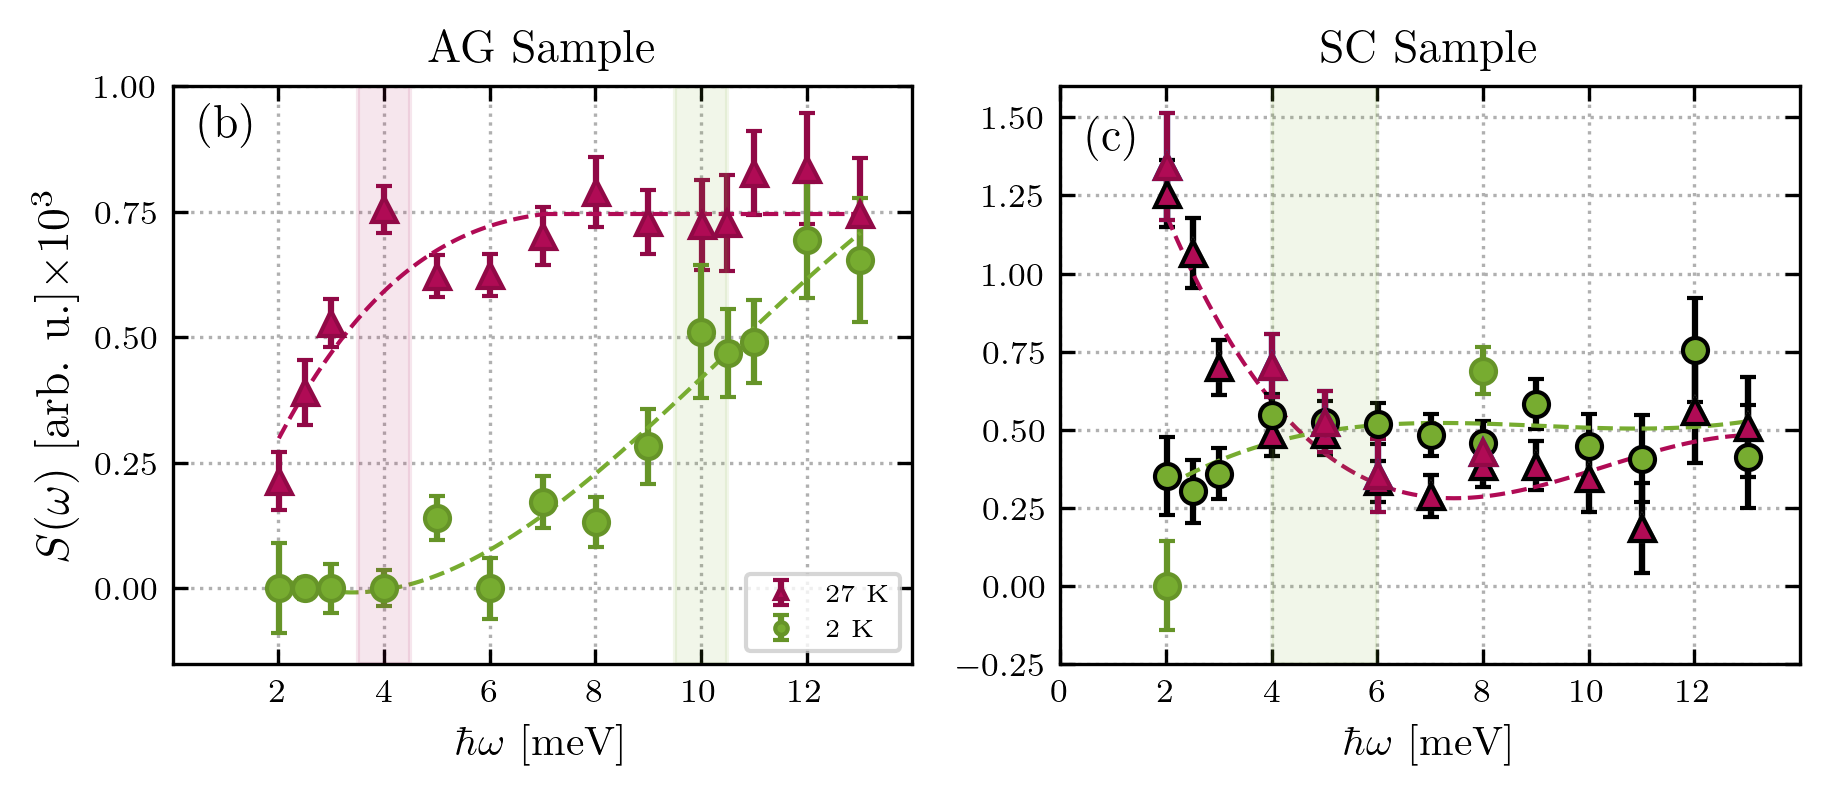

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
#fig.subplots_adjust(hspace=0.03, wspace=0.05)

ax[1].grid(linestyle='dotted')
ax[0].errorbar(EN_ag_27K, np.asarray(A_ag_27K)*10**(3), capsize=2, yerr=np.asarray(A_err_ag_27K)*10**(3), fmt='^', label='27 K', color='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946')
ax[0].plot(x_energy_ag_27K, spliney_A_ag_27K*10**(3), '--', color='#B00B55', linewidth=1)
ax[0].plot(np.linspace(7,13,100), np.ones(100)*0.74493, '--', color='#B00B55', linewidth=1)

ax[0].errorbar(EN_ag_2K, np.asarray(A_ag_2K)*10**(3), capsize=2, yerr=np.asarray(A_err_ag_2K)*10**(3), fmt='o', label='2 K', color='#77AC30', ecolor='#669428', mew=1, markeredgecolor='#669428')
ax[0].plot(x_energy_ag_2K, spliney_A_ag_2K*10**(3), '--', color='#77AC30', linewidth=1)
ax[0].grid(linestyle='dotted')
ax[0].set_xticks([2, 4, 6, 8, 10, 12])
ax[0].legend(fontsize=6, markerscale=0.5, loc='lower right')
ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax[0].text(0.5, 0.9, r"(b)", fontsize=11, color="black")
ax[0].fill_betweenx(y=[-0.15, 1], x1=3.5, x2=4.5,
                 color="#B00B55", alpha=0.1, zorder=2)
ax[0].fill_betweenx(y=[-0.15, 1], x1=9.5, x2=10.5,
                 color="#77AC30", alpha=0.1, zorder=2)

#ax[0].arrow(4, 0.4, 0, 0.1, head_width=0.3, head_length=0.05, fc="#B00B55", ec="black", zorder=5)
#ax[0].arrow(10, 0.2, 0, 0.1, head_width=0.3, head_length=0.05, fc="#77AC30", ec="black", zorder=5)

#ax[0].axvspan(0, 0.4, color='grey', alpha=0.3)  # Slightly transparent grey box

ax[1].errorbar(EN_sc_p3_27K, np.asarray(sc_p3_area_27K)*10**(3), capsize=2, yerr=np.asarray(sc_p3_area_err_27K)*10**(3), fmt='^', label='3-point scan IN20', color='grey')
ax[1].errorbar(EN_sc_p3_27K, np.asarray(sc_p3_area_27K)*10**(3), capsize=2, yerr=np.asarray(sc_p3_area_err_27K)*10**(3), fmt='^', color='#B00B55', ecolor='k', mew=1, markeredgecolor='k')
ax[1].plot(x_energy_sc_27K, spliney_A_sc_27K*10**(3), '--', color='#B00B55', linewidth=1)


ax[1].errorbar(EN_sc_p3_2K, np.asarray(sc_p3_area_2K)*10**(3), capsize=2, yerr=np.asarray(sc_p3_area_err_2K)*10**(3), fmt='o', color='#77AC30', ecolor='k', mew=1, markeredgecolor='k')
ax[1].plot(x_energy_sc_2K, spliney_A_sc_2K*10**(3), '--', color='#77AC30', linewidth=1)
ax[1].fill_betweenx(y=[-0.25, 1.6], x1=4, x2=6,
                 color="#77AC30", alpha=0.1, zorder=2)

ax[1].errorbar(EN_sc_27K, np.asarray(A_sc_27K)*10**(3), yerr=np.asarray(A_err_sc_27K)*10**(3), capsize=2, fmt='^', markerfacecolor='grey')
ax[1].errorbar(EN_sc_27K, np.asarray(A_sc_27K)*10**(3), yerr=np.asarray(A_err_sc_27K)*10**(3), capsize=2, fmt='^', markerfacecolor='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946')
ax[1].errorbar(EN_sc_2K, np.asarray(A_sc_2K)*10**(3), yerr=np.asarray(A_err_sc_2K)*10**(3), capsize=2, fmt='o', markerfacecolor='#77AC30',  ecolor='#669428', mew=1, markeredgecolor='#669428')

#ax[1].axvspan(0, 0.4, color='grey', alpha=0.3, label='FWHM IN20')
ax[1].text(0.5, 1.4, r"(c)", fontsize=11, color="black")
ax[1].grid(linestyle='dotted')
ax[1].set_xticks([0, 2, 4, 6, 8, 10, 12])

ax[0].set_title('AG Sample', fontsize=11)
ax[1].set_title('SC Sample', fontsize=11)
#ax[1].legend(fontsize=6, markerscale=0.5)
ax[0].set_ylim(-0.15,1)
ax[1].set_ylim(-0.25,1.6)
ax[1].set_xlim(0, 14)
ax[0].set_xlim(0, 14)
ax[1].set_xlabel('$\hbar \omega$ [meV]')
ax[0].set_xlabel('$\hbar \omega$ [meV]')
ax[0].set_ylabel(r'$ S(\omega)$ [arb. u.]$\times 10^3$', fontsize=11)


print(spliney_A_sc_27K*10**(3))

<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:11: SyntaxWarning: invalid escape sequence '\h'
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/3018126839.py:8: SyntaxWarning: invalid escape sequence '\h'
  ax[0].errorbar(TT_ag_2mev, np.asarray(A_ag_2mev)*10**(3), capsize=2, yerr=np.asarray(A_err_ag_2mev)*10**(3), fmt='s', label='$\hbar \omega =$ 2 meV',  color='#0072BD', markerfacecolor='#0072BD', ecolor='#005287', mew=1,  markeredgecolor='#005287')
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/3018126839.py:11: SyntaxWarning: invalid escape sequence '\h'
  ax[0].errorbar(TT_ag_8mev, np.asarray(A_ag_8mev)*10**(3), capsize=2, yerr=np.asarray(A_err_ag_8mev)*10**(3), fmt='d', label='$\hbar \omega =$ 8 meV', color='#EDB120', markerfacecolor='#EDB120', ecolor='#ad8117', mew=1,  markeredgecolor='#ad8117')
The PostScript backend does not support transp

[-5.25729376e-04  3.64035563e-03  7.92447742e-03  1.23268787e-02
  1.68478023e-02  2.14874908e-02  2.62461871e-02  3.11241339e-02
  3.61215738e-02  4.12387496e-02  4.64759042e-02  5.18332801e-02
  5.73111201e-02  6.29096670e-02  6.86291635e-02  7.44698524e-02
  8.04319763e-02  8.65157780e-02  9.27215002e-02  9.90493858e-02
  1.05499677e-01  1.12072618e-01  1.18768449e-01  1.25587415e-01
  1.32529758e-01  1.39595721e-01  1.46785546e-01  1.54099476e-01
  1.61537754e-01  1.69100622e-01  1.76788324e-01  1.84601102e-01
  1.92539199e-01  2.00602858e-01  2.08792320e-01  2.17107830e-01
  2.25549630e-01  2.34117962e-01  2.42813069e-01  2.51635194e-01
  2.60584580e-01  2.69661469e-01  2.78866104e-01  2.88198729e-01
  2.97659585e-01  3.07248915e-01  3.16966963e-01  3.26813970e-01
  3.36790180e-01  3.46895835e-01  3.57131178e-01  3.67496452e-01
  3.77991899e-01  3.88617763e-01  3.99374286e-01  4.10261710e-01
  4.21280279e-01  4.32430235e-01  4.43711821e-01  4.55125279e-01
  4.66670853e-01  4.78348

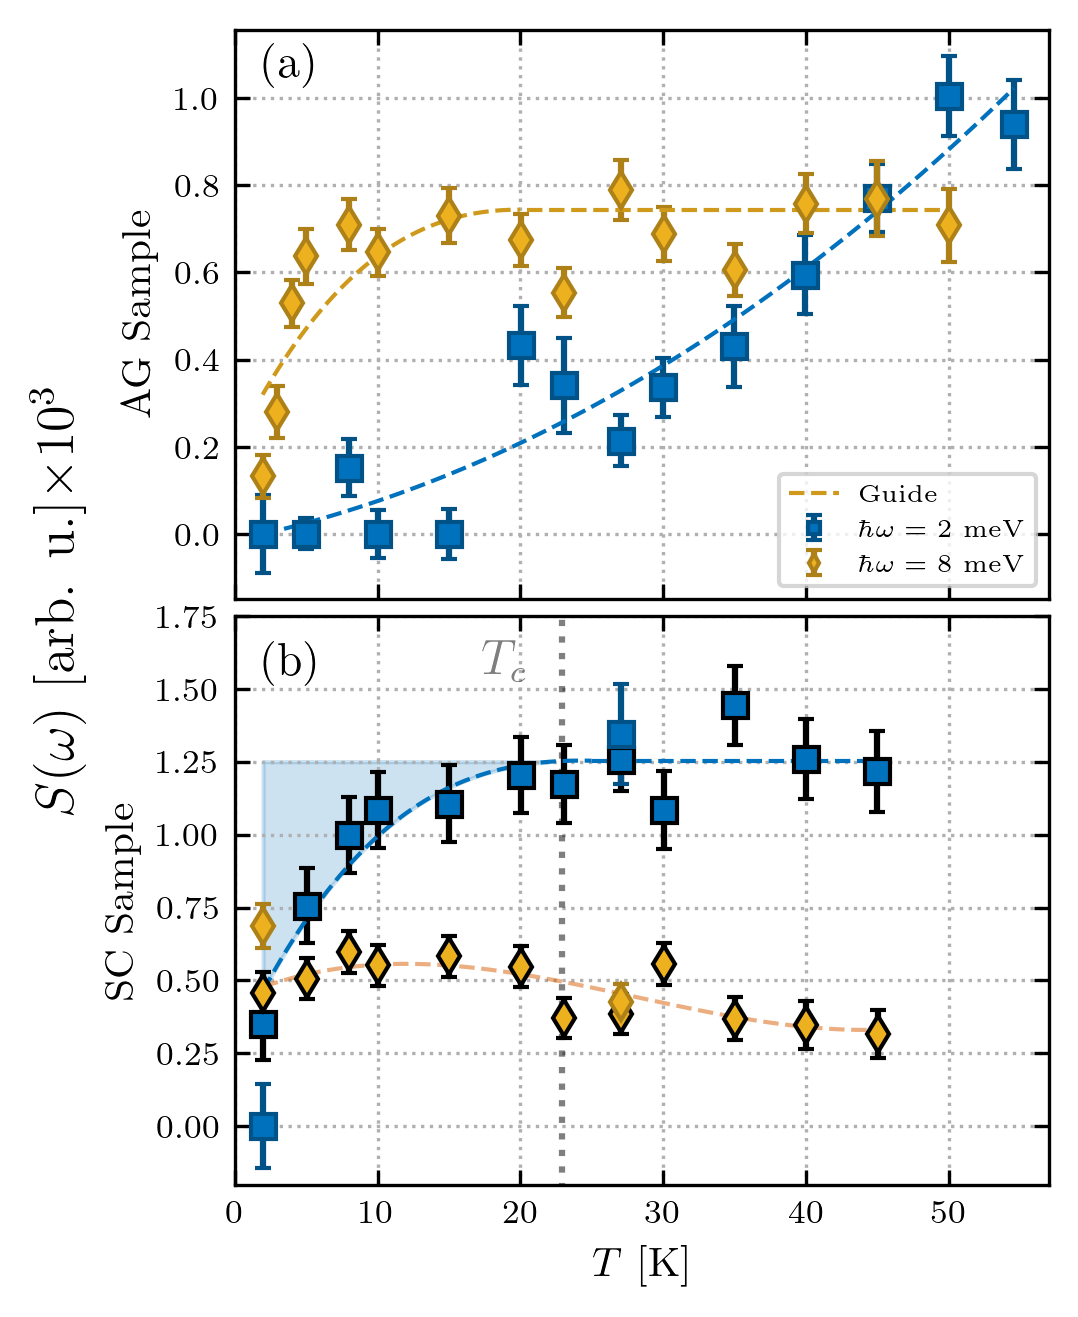

In [85]:
fig, ax = plt.subplots(2, 1,figsize=(3.5, 5))
fig.subplots_adjust(hspace=0.03, wspace=0.05)
#############################

Tc = np.ones(1000) * 22.92


ax[0].errorbar(TT_ag_2mev, np.asarray(A_ag_2mev)*10**(3), capsize=2, yerr=np.asarray(A_err_ag_2mev)*10**(3), fmt='s', label='$\hbar \omega =$ 2 meV',  color='#0072BD', markerfacecolor='#0072BD', ecolor='#005287', mew=1,  markeredgecolor='#005287')
ax[0].plot(x_temp_ag_2mev, np.asarray(spliney_A_ag_2mev)*10**(3), '--', color='#0072BD', linewidth=1)

ax[0].errorbar(TT_ag_8mev, np.asarray(A_ag_8mev)*10**(3), capsize=2, yerr=np.asarray(A_err_ag_8mev)*10**(3), fmt='d', label='$\hbar \omega =$ 8 meV', color='#EDB120', markerfacecolor='#EDB120', ecolor='#ad8117', mew=1,  markeredgecolor='#ad8117')
ax[0].plot(x_temp_ag_8mev, np.asarray(spliney_A_ag_8mev)*10**(3), '--', color='#cf9a1b', linewidth=1, label='Guide')
ax[0].plot(np.linspace(20.5,50,100), np.ones(100)*spliney_A_ag_8mev[-1]*10**(3),  '--', color='#cf9a1b', linewidth=1)

ax[0].grid(linestyle='dotted')
ax[0].legend(fontsize=6, markerscale=0.5, loc='lower right')
ax[0].set_xlim(0, 57)
ax[0].set_xticklabels([])
ax[0].set_xticks([0, 10, 20, 30, 40, 50,])
ax[1].set_xticks([0, 10, 20, 30, 40, 50,])
ax[0].text(2, 1.05, r"(a)", fontsize=11, color="black")

ax[1].errorbar(TT_sc_p3_2mev, np.asarray(sc_p3_area_2mev)*10**(3), capsize=2, fmt='s', yerr=np.asarray(sc_p3_area_err_2mev)*10**(3), color='#0072BD', markerfacecolor='#0072BD', ecolor='k', mew=1, markeredgecolor='k')
ax[1].plot(x_temp_sc_2mev, np.asarray(spliney_A_sc_2mev)*10**(3), '--', color='#0072BD', linewidth=1)
ax[1].plot(np.linspace(25,45,100), np.ones(100)*spliney_A_sc_2mev[-1]*10**(3),  '--', color='#0072BD', linewidth=1)
ax[1].text(2, 1.55, r"(b)", fontsize=11, color="black")

#ax[1].errorbar(TT_sc_p3_8mev, np.asarray(sc_p3_area_8mev)*10**(3), capsize=2, fmt='d', yerr=np.asarray(sc_p3_area_err_8mev)*10**(3), label='3-point scans', color='grey', markerfacecolor='grey', ecolor='k', mew=0.5, markeredgecolor='k')
ax[1].errorbar(TT_sc_p3_8mev, np.asarray(sc_p3_area_8mev)*10**(3), capsize=2, fmt='d', yerr=np.asarray(sc_p3_area_err_8mev)*10**(3), color='#EDB120', markerfacecolor='#EDB120', ecolor='k', mew=1, markeredgecolor='k')
ax[1].plot(x_temp_sc_8mev, np.asarray(spliney_A_sc_8mev)*10**(3), '--', color='#d95f02', linewidth=1, alpha=0.5)


ax[1].errorbar(TT_sc_2mev, np.asarray(A_sc_2mev)*10**(3), yerr=np.asarray(A_err_sc_2mev)*10**(3), capsize=2, fmt='s', color='#0072BD', markerfacecolor='#0072BD', ecolor='#005287', mew=1,  markeredgecolor='#005287')
ax[1].errorbar(TT_sc_8mev, np.asarray(A_sc_8mev)*10**(3), yerr=np.asarray(A_err_sc_8mev)*10**(3), capsize=2, fmt='d',  color='#EDB120', markerfacecolor='#EDB120', ecolor='#ad8117', mew=1,  markeredgecolor='#ad8117')
# Fill area between function and constant line
ax[1].fill_between(x_temp_sc_2mev, np.asarray(spliney_A_sc_2mev)*10**(3), 1.25, where=(np.asarray(spliney_A_sc_2mev)*10**(3) < 1.25), color="#0072BD", alpha=0.2)

ax[1].grid(linestyle='dotted')
ax[1].plot(Tc, np.linspace(-0.5, 9, 1000), linestyle='dotted', color='k', alpha=0.5)
ax[1].set_xlim(0, 57)
ax[1].set_ylim(-0.2, 1.75)
ax[1].set_xlabel('$T$ [K]')
ax[0].set_ylabel('AG Sample')
ax[1].set_ylabel('SC Sample')
#ax[1].legend(fontsize=6, markerscale=0.8)
fig.text(-0.07, 0.5, r'$ S(\omega)$ [arb. u.]$\times 10^3$', va='center', rotation='vertical', fontsize=13)


# Text color updated from Pink to Green
fig.text(0.36, 0.45, '$T_c$', fontsize=12, color='k', alpha=0.5)

plt.savefig('Figures_eps/IN20/T_dependence.eps', format='eps', bbox_inches='tight')
plt.savefig('Figures_png/IN20/T_dependence.png', format='png', bbox_inches='tight')

print(np.asarray(spliney_A_ag_2mev)*10**(3))


## 2 K - 27 K

<>:42: SyntaxWarning: invalid escape sequence '\h'
<>:42: SyntaxWarning: invalid escape sequence '\h'
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/4277048926.py:42: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('$\hbar \omega$ [meV]')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[-0.27741298 -0.3037939  -0.32906115 -0.35323144 -0.37632144 -0.39834786
 -0.41932738 -0.43927669 -0.45821249 -0.47615146 -0.4931103  -0.50910569
 -0.52415433 -0.53827291 -0.55147812 -0.56378664 -0.57521517 -0.58578041
 -0.59549903 -0.60438774 -0.61246321 -0.61974215 -0.62624125 -0.63197718
 -0.63696666 -0.64122636 -0.64477297 -0.64762319 -0.64979371 -0.65130122
 -0.65216241 -0.65239396 -0.65201258 -0.65103495 -0.64947776 -0.6473577
 -0.64469146 -0.64149574 -0.63778723 -0.6335826  -0.62889857 -0.62375181
 -0.61815902 -0.61213689 -0.6057021  -0.59887136 -0.59166134 -0.58408875
 -0.57617026 -0.56792258 -0.55936239 -0.55050639 -0.54137126 -0.53197369
 -0.52233038 -0.51245802 -0.50237329 -0.49209289 -0.48163351 -0.47101184
 -0.46024457 -0.44934839 -0.43833999 -0.42723606 -0.4160533  -0.40480838
 -0.39351801 -0.38219888 -0.37086767 -0.35954108 -0.34823579 -0.3369685
 -0.3257559  -0.31461468 -0.30356152 -0.29261313 -0.28178619 -0.27109739
 -0.26056342 -0.25020097 -0.24002674 -0.23005741 -0.2

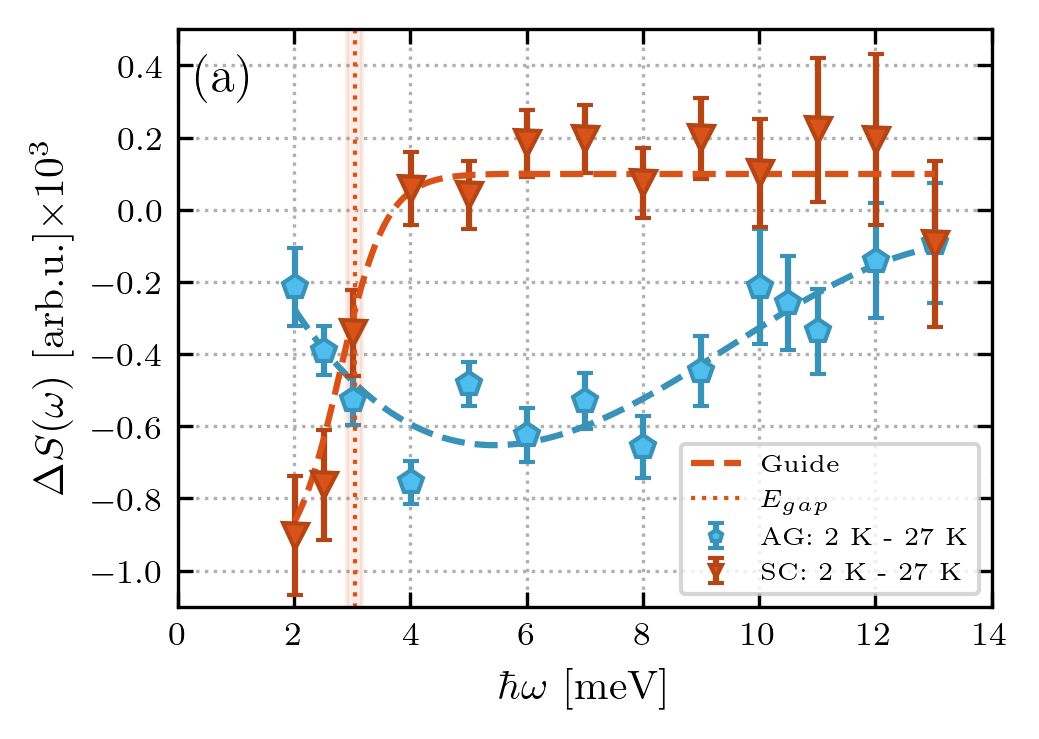

In [80]:
#################################### calc data ####################################

amp_sc_p3_TT = np.asarray(sc_p3_area_2K) - np.asarray(sc_p3_area_27K)
amp_err_sc_p3_TT = np.sqrt(np.asarray(sc_p3_area_err_27K)**2 + np.asarray(sc_p3_area_err_2K)**2)

ag_tt = np.asarray(A_ag_2K) - np.asarray(A_ag_27K)
ag_tt_err = np.sqrt(np.asarray(A_err_ag_27K)**2 + np.asarray(A_err_ag_2K)**2)

#################################### spline ####################################

x_energy_ag = np.linspace(np.min(EN_ag_27K), np.max(EN_ag_27K), 100)
x_energy_sc = np.linspace(np.min(EN_ag_27K),6, 100)

spline_amp_sc_p3_TT = UnivariateSpline(EN_sc_p3_27K, amp_sc_p3_TT, s=2)  # s is the smoothing factor
spliney_amp_sc_p3_TT = spline_amp_sc_p3_TT(x_energy_sc)

spline_ag_tt = UnivariateSpline(EN_ag_27K, ag_tt, s=2)  # s is the smoothing factor
spliney_ag_tt = spline_ag_tt(x_energy_ag)


def sigmoid2(x, x0, k, top,b):
    y =  (top) / (1 + np.exp(-k*(x-x0))) + b
    return y
#################################### PLOT ######################################

plt.figure()

plt.errorbar(EN_ag_27K, np.asarray(ag_tt)*10**3, capsize=2, yerr=np.asarray(ag_tt_err)*10**3, label='AG: 2 K - 27 K', marker='p', linestyle='none', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8')
plt.plot(x_energy_ag, np.asarray(spliney_ag_tt)*10**3, '--', color='#3992b8')


plt.errorbar(EN_sc_p3_27K, np.asarray(amp_sc_p3_TT)*10**3, capsize=2, yerr=np.asarray(amp_err_sc_p3_TT)*10**3, label='SC: 2 K - 27 K', marker = 'v', linestyle='none',color='#d95319', ecolor='#b54514', mew=1, markeredgecolor='#b54514')
plt.plot(x_energy_sc, sigmoid2(x_energy_sc, x_cross_sc_mm-0.25, 2.5, 1.1, -1.0), '--', color="#d95319")


#plt.plot(x_energy_sc, np.asarray(spliney_amp_sc_p3_TT)*10**3, '--', color='#b54514')
plt.plot(np.linspace(6, np.max(EN_ag_27K), 100), np.ones(100)*spliney_amp_sc_p3_TT[-1]*10**3-0.09, '--', color='#d95319', label='Guide')
plt.fill_betweenx(y=[-5,3], x1=x_cross_sc_mm-x_cross_sc_mm_err, x2=x_cross_sc_mm+x_cross_sc_mm_err, color="#d95319", alpha=0.1, zorder=2)
plt.plot(np.ones(100)*x_cross_sc_mm, np.linspace(-5, 3, 100), linestyle='dotted', color='#d95319', linewidth=1, label='$E_{gap}$')

plt.ylabel(r'$\Delta S(\omega)$ [arb.u.]$\times 10^3$')
plt.xlabel('$\hbar \omega$ [meV]')
plt.grid(linestyle='dotted')
plt.xlim(0,14)
plt.ylim(-1.1,0.5)
plt.legend(fontsize=6, markerscale=0.5)
plt.text(0.3, 0.33, '(a)', fontsize=12, color='k')
plt.savefig('Figures_eps/IN20/T_difference.eps', format='eps', bbox_inches='tight')
plt.savefig('Figures_png/IN20/T_difference.png', format='png', bbox_inches='tight')

print(np.asarray(spliney_ag_tt)*10**3)

In [ ]:
print(np.asarray(A_ag_8mev)[0:14])

/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/1198679052.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "p" (-> marker='p'). The keyword argument will take precedence.
  plt.errorbar(TT_ag_2mev, np.asarray(AG_E_diff)*10**3, capsize=2, fmt='p', yerr=np.asarray(AG_E_diff_err)*10**3, label='AG: 2 meV - 8 meV',marker='p', linestyle='none', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[-1.64335373e-04 -1.93776716e-04 -2.21801657e-04 -2.48433023e-04
 -2.73693638e-04 -2.97606326e-04 -3.20193911e-04 -3.41479219e-04
 -3.61485073e-04 -3.80234298e-04 -3.97749719e-04 -4.14054160e-04
 -4.29170446e-04 -4.43121400e-04 -4.55929849e-04 -4.67618616e-04
 -4.78210525e-04 -4.87728401e-04 -4.96195070e-04 -5.03633354e-04
 -5.10066079e-04 -5.15516069e-04 -5.20006149e-04 -5.23559144e-04
 -5.26197877e-04 -5.27945173e-04 -5.28823857e-04 -5.28856753e-04
 -5.28066686e-04 -5.26476480e-04 -5.24108960e-04 -5.20986950e-04
 -5.17133275e-04 -5.12570759e-04 -5.07322227e-04 -5.01410504e-04
 -4.94858413e-04 -4.87688779e-04 -4.79924427e-04 -4.71588182e-04
 -4.62702867e-04 -4.53291308e-04 -4.43376328e-04 -4.32980753e-04
 -4.22127407e-04 -4.10839114e-04 -3.99138698e-04 -3.87048986e-04
 -3.74592800e-04 -3.61792965e-04 -3.48672306e-04 -3.35253648e-04
 -3.21559815e-04 -3.07613631e-04 -2.93437920e-04 -2.79055509e-04
 -2.64489220e-04 -2.49761878e-04 -2.34896309e-04 -2.19915336e-04
 -2.04841784e-04 -1.89698

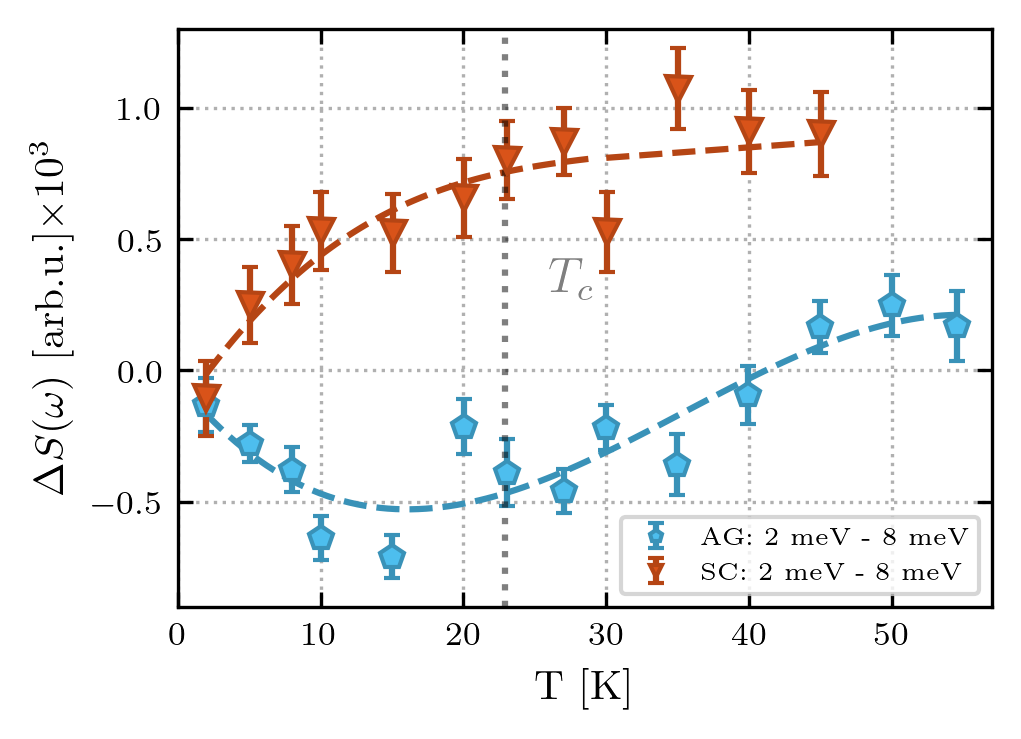

In [81]:
#################################### calc data ####################################

AG_E_diff = np.asarray(A_ag_2mev) - np.asarray(A_ag_8mev)[0:14]
AG_E_diff_err = np.sqrt(np.asarray(A_err_ag_2mev)**2 + (np.asarray(A_err_ag_8mev)[0:14])**2)

SC_E_diff = np.asarray(sc_p3_area_2mev) - np.asarray(sc_p3_area_8mev)
SC_E_diff_err = np.sqrt(np.asarray(sc_p3_area_err_2mev)**2 + np.asarray(sc_p3_area_err_8mev)**2)

#################################### spline ####################################

x_temp = np.linspace(np.min(TT_ag_2mev), np.max(TT_ag_2mev), 100)
x_temp_sc = np.linspace(np.min(TT_sc_p3_8mev), 29.1, 100)

spline_ag_E_diff = UnivariateSpline(TT_ag_2mev, AG_E_diff, s=2)  # s is the smoothing factor
spliney_ag_E_diff = spline_ag_E_diff(x_temp)


spline_sc_E_diff = UnivariateSpline(TT_sc_p3_8mev, SC_E_diff, s=1)  # s is the smoothing factor
spliney_sc_E_diff = spline_sc_E_diff(x_temp_sc)

#################################### PLOT ######################################

plt.figure()

plt.errorbar(TT_ag_2mev, np.asarray(AG_E_diff)*10**3, capsize=2, fmt='p', yerr=np.asarray(AG_E_diff_err)*10**3, label='AG: 2 meV - 8 meV',marker='p', linestyle='none', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8')
plt.plot(x_temp, np.asarray(spliney_ag_E_diff)*10**3, '--', color='#3992b8')

plt.errorbar(TT_sc_p3_8mev, np.asarray(SC_E_diff)*10**3, capsize=2, fmt='v', yerr=np.asarray(SC_E_diff_err)*10**3, label='SC: 2 meV - 8 meV', color='#d95319', ecolor='#b54514', mew=1, markeredgecolor='#b54514')
plt.plot(x_temp_sc, np.asarray(spliney_sc_E_diff)*10**3, '--', color='#b54514')
plt.plot(np.linspace(30, np.max(TT_sc_p3_8mev),100), model_const(np.linspace(30, np.max(TT_sc_p3_8mev),100), 0.004, 0.69), '--', color='#b54514')

plt.plot(Tc, np.linspace(-0.9, 1.3, 1000), linestyle='dotted', color='k', alpha=0.5)
plt.ylim(-0.9, 1.3)
plt.xlim(0,57)
plt.text(26, 0.3, '$T_c$', fontsize=12, color='k', alpha=0.5)
plt.ylabel(r'$\Delta S(\omega)$ [arb.u.]$\times 10^3$')
plt.xlabel('T [K]')
plt.grid(linestyle='dotted')
plt.legend(fontsize=6, markerscale=0.5)
#plt.ylim(-1,1.75)

plt.savefig('Figures_eps/IN20/E_difference.eps', format='eps', bbox_inches='tight')
plt.savefig('Figures_png/IN20/E_difference.png', format='png', bbox_inches='tight')

print(np.asarray(spliney_ag_E_diff))

<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:18: SyntaxWarning: invalid escape sequence '\h'
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/550351604.py:18: SyntaxWarning: invalid escape sequence '\h'
  ax[0].set_xlabel('$\hbar \omega$ [meV]')
/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_99004/550351604.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "p" (-> marker='p'). The keyword argument will take precedence.
  ax[1].errorbar(TT_ag_2mev, np.asarray(AG_E_diff)*10**3, capsize=2, fmt='p', yerr=np.asarray(AG_E_diff_err)*10**3, label='AG: 2 meV - 8 meV',marker='p', linestyle='none', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


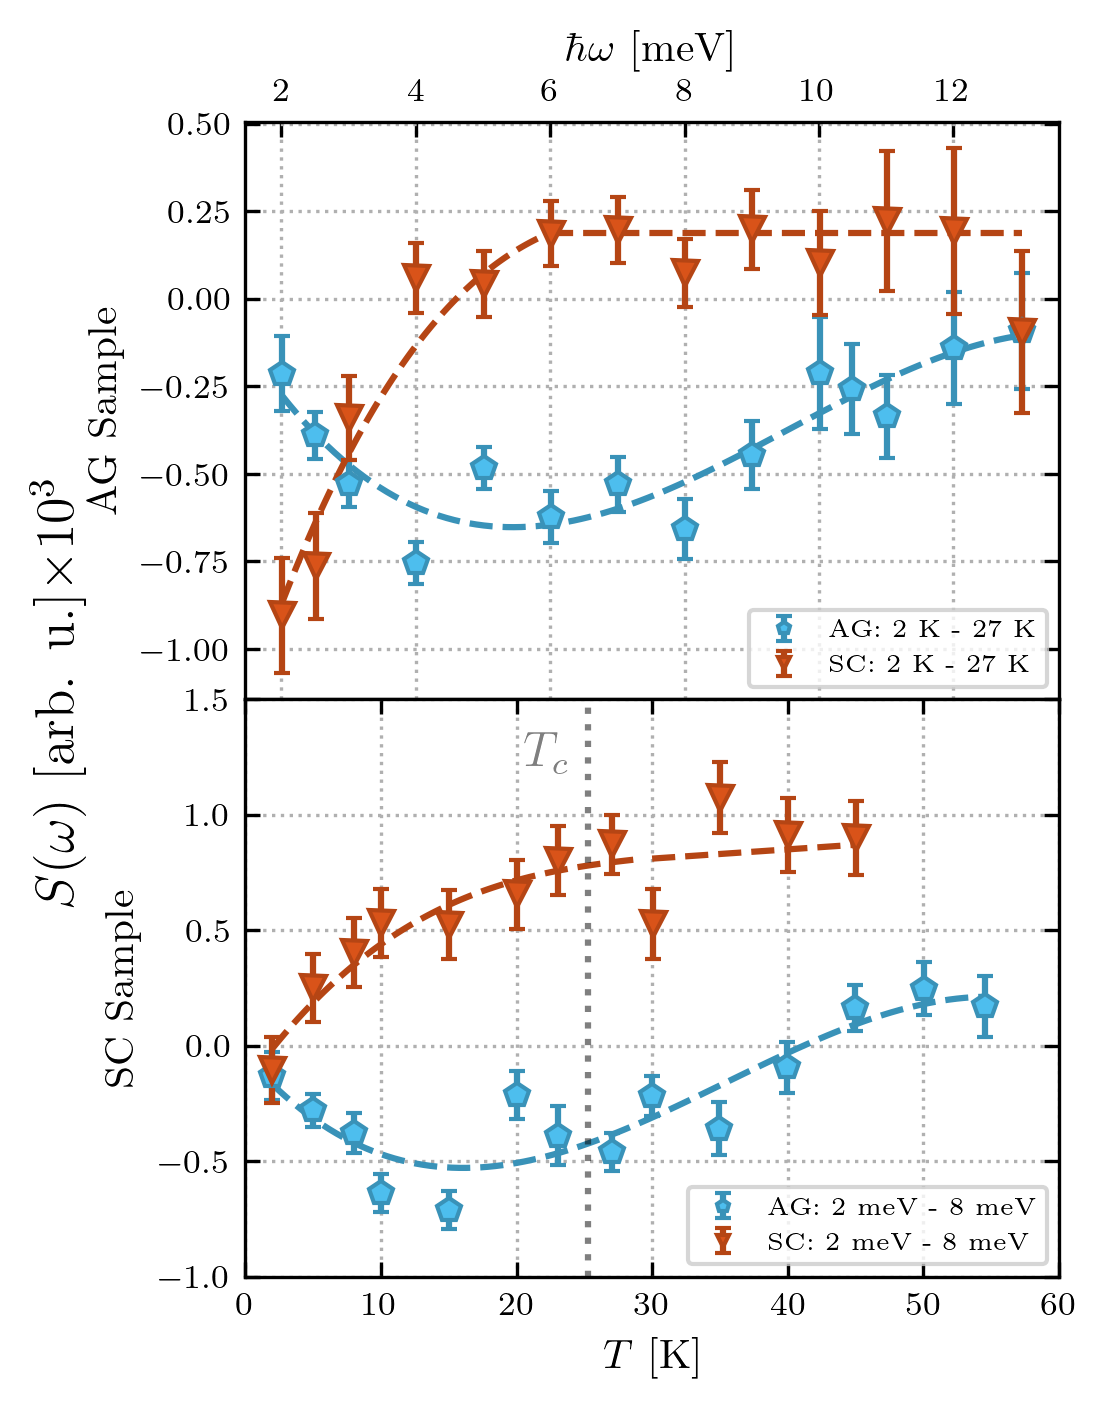

In [82]:
fig, ax = plt.subplots(2, 1,figsize=(3.5, 5))
fig.subplots_adjust(hspace=0, wspace=0.05)
#############################

Tc = np.ones(1000) * 25.3

ax[0].errorbar(EN_ag_27K, np.asarray(ag_tt)*10**3, capsize=2, yerr=np.asarray(ag_tt_err)*10**3, label='AG: 2 K - 27 K', marker='p', linestyle='none', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8')
ax[0].plot(x_energy_ag, np.asarray(spliney_ag_tt)*10**3, '--', color='#3992b8')


ax[0].errorbar(EN_sc_p3_27K, np.asarray(amp_sc_p3_TT)*10**3, capsize=2, yerr=np.asarray(amp_err_sc_p3_TT)*10**3, marker = 'v', linestyle='none', label='SC: 2 K - 27 K',color='#d95319', ecolor='#b54514', mew=1, markeredgecolor='#b54514')
ax[0].plot(x_energy_sc, np.asarray(spliney_amp_sc_p3_TT)*10**3, '--', color='#b54514')
ax[0].plot(np.linspace(6, np.max(EN_ag_27K), 100), np.ones(100)*spliney_amp_sc_p3_TT[-1]*10**3, '--', color='#b54514')


ax[0].grid(linestyle='dotted')
ax[0].legend(fontsize=6, markerscale=0.5)
ax[0].set_xlabel('$\hbar \omega$ [meV]')
ax[0].xaxis.set_label_position('top')  # Set x-axis label on the top for first subplot
ax[0].xaxis.tick_top()

ax[1].errorbar(TT_ag_2mev, np.asarray(AG_E_diff)*10**3, capsize=2, fmt='p', yerr=np.asarray(AG_E_diff_err)*10**3, label='AG: 2 meV - 8 meV',marker='p', linestyle='none', color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8')
ax[1].plot(x_temp, np.asarray(spliney_ag_E_diff)*10**3, '--', color='#3992b8')

ax[1].errorbar(TT_sc_p3_8mev, np.asarray(SC_E_diff)*10**3, capsize=2, fmt='v', yerr=np.asarray(SC_E_diff_err)*10**3, label='SC: 2 meV - 8 meV', color='#d95319', ecolor='#b54514', mew=1, markeredgecolor='#b54514')
ax[1].plot(x_temp_sc, np.asarray(spliney_sc_E_diff)*10**3, '--', color='#b54514')
ax[1].plot(np.linspace(30, np.max(TT_sc_p3_8mev),100), model_const(np.linspace(30, np.max(TT_sc_p3_8mev),100), 0.004, 0.69), '--', color='#b54514')

ax[1].grid(linestyle='dotted')
ax[1].plot(Tc, np.linspace(-1, 1.5, 1000), linestyle='dotted', color='k', alpha=0.5)
ax[1].set_xlim(0, 60)
ax[1].set_ylim(-1, 1.5)

ax[1].set_xlabel('$T$ [K]')
ax[0].set_ylabel('AG Sample')
ax[1].set_ylabel('SC Sample')
ax[1].legend(fontsize=6, markerscale=0.5)
fig.text(-0.08, 0.5, r'$ S(\omega)$ [arb. u.]$\times 10^3$', va='center', rotation='vertical', fontsize=13)


# Text color updated from Pink to Green
fig.text(0.39, 0.45, '$T_c$', fontsize=12, color='k', alpha=0.5)

plt.savefig('Figures_eps/IN20/Differences.eps', format='eps', bbox_inches='tight')
plt.savefig('Figures_png/IN20/Differences.png', format='png', bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


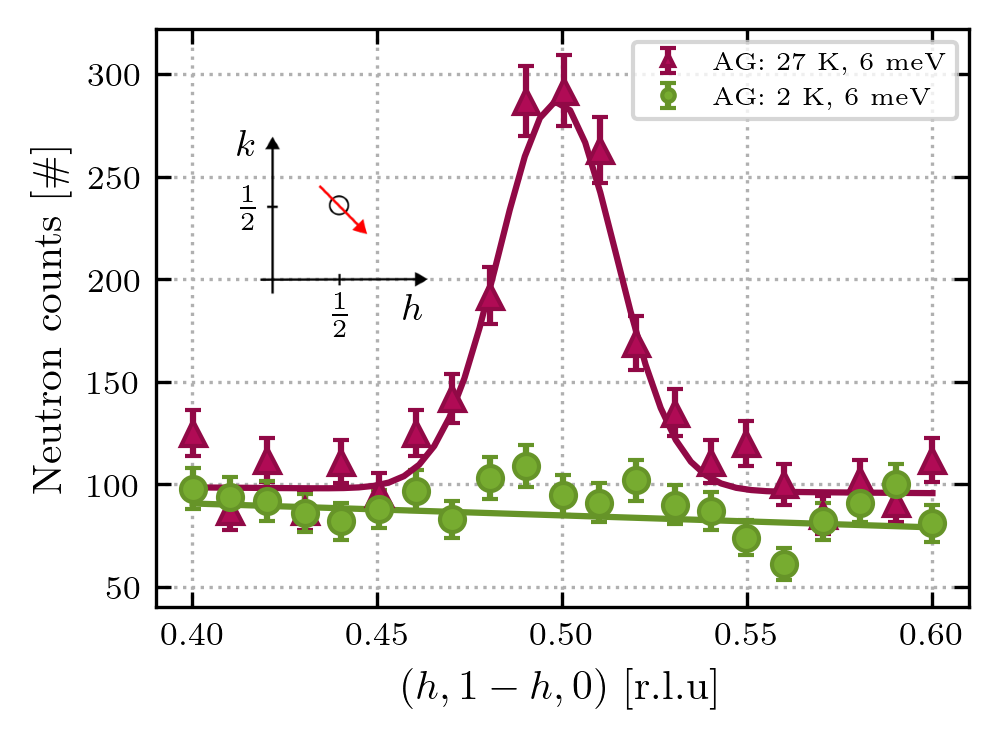

In [83]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
plt.errorbar(ag_q_27K_4mev.QK, ag_q_27K_4mev.CNT, capsize = 2, yerr =ag_q_27K_4mev.CNT_err, label = 'AG: 27 K, 6 meV', fmt='^', color='#B00B55', ecolor='#910946', mew=1, markeredgecolor='#910946')
plt.errorbar(ag_q_2K_4mev.QK, ag_q_2K_4mev.CNT, capsize = 2, yerr =ag_q_2K_4mev.CNT_err, fmt = 'o', label = 'AG: 2 K, 6 meV', color='#77AC30', ecolor='#669428', mew=1, markeredgecolor='#669428')

qk_range = np.linspace(min(ag_q_27K_4mev.QK), max(ag_q_27K_4mev.QK))

plt.plot(qk_range, gauss_const(qk_range, *ag_q_27K_4mev.best_fit_obj.values)*10000, color='#910946')
plt.plot(qk_range, model_const(qk_range, *ag_q_2K_4mev.best_fit_obj.values)*10000, color='#669428')


plt.xlabel('$(h,1-h,0)$ [r.l.u]')
plt.ylabel(r'Neutron counts [\#]') # /($4\times10^7$ monitor)
#ax[1].set_yticks([0, 50, 100, 150, 200])
plt.xticks([0.4, 0.45, 0.5, 0.55, 0.6])
plt.grid(linestyle='dotted')
plt.legend(fontsize=6, markerscale=0.5)
fig.text(0.05, 1.95, 'Sample A - AG', transform=plt.gca().transAxes, verticalalignment='top')
fig.text(0.05, 0.95, 'Sample C - SC', transform=plt.gca().transAxes, verticalalignment='top')


# Load the EPS file
img_path = "Figures_png/scanakse.png"  # Replace with your EPS file path
img = Image.open(img_path)           # Load the EPS file
img.thumbnail((700, 700))            # Adjust the size if necessary       # Load the EPS file

# Define the crop box (left, upper, right, lower) in pixels
# Adjust these coordinates to fit the part of the image you want to crop
crop_box = (0, 0, 550, 510)
cropped_img = img.crop(crop_box)

# Resize the cropped image if necessary
cropped_img.thumbnail((500, 500))  # Adjust the size as needed

# Insert the cropped image as an inset
imagebox = OffsetImage(cropped_img, zoom=0.20)  # Adjust zoom level as needed
ab = AnnotationBbox(imagebox, (0.33, 0.55),  # (x, y) position in axes fraction
                    xycoords='axes fraction', frameon=False)
plt.gca().add_artist(ab)  # Add the inset to the current axis

plt.text(x=0.46, y=185, s=r'$h$', fontsize=9, color='black', ha='center', va='center')
plt.text(x=0.440, y=183, s=r'$\frac{1}{2}$', fontsize=9, color='black', ha='center', va='center')

plt.text(x=0.415, y=265, s=r'$k$', fontsize=9, color='black', ha='center', va='center')
plt.text(x=0.415, y=235, s=r'$\frac{1}{2}$', fontsize=9, color='black', ha='center', va='center')

plt.savefig('Figures_eps/IN20/Raw_data.eps', format='eps', bbox_inches='tight', dpi=300)
plt.savefig('Figures_png/IN20/Raw_data.png', format='png', bbox_inches='tight', dpi=300)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis
fig, ax = plt.subplots()

# Plot settings: limit axis to positive regions and mark midpoints
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axhline(0, color='black', linewidth=1.0)
ax.axvline(0, color='black', linewidth=1.0)

# Add gridlines
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add circle at (0.5, 0.5)
circle = plt.Circle((0.5, 0.5), 0.02, color='blue', fill=True, label="Circle at (0.5, 0.5)")
ax.add_artist(circle)

# Add arrow from (0.4, 0.6) to (0.6, 0.4)
ax.arrow(0.4, 0.6, 0.2, -0.2, head_width=0.03, head_length=0.03, fc='red', ec='red')

# Annotate points and customize
ax.text(0.5, 0.5, '(0.5, 0.5)', fontsize=8, verticalalignment='bottom', horizontalalignment='left')
ax.text(0.4, 0.6, '(0.4, 0.6)', fontsize=8, verticalalignment='top', horizontalalignment='right')
ax.text(0.6, 0.4, '(0.6, 0.4)', fontsize=8, verticalalignment='top', horizontalalignment='left')

# Label axes
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

# Title
plt.title("Illustration of Coordinate System")

# Show plot
plt.show()